<a href="https://colab.research.google.com/github/leyli16/HousingPricePrediction/blob/main/final_project_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

## Loading data through kaggle setup

In [2]:
%%capture
!pip instsall kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


# USA Real Estate Data Wrangling, Cleaning, and EDA

## Loading in USA Real Estate Dataset


In [5]:
#!/bin/bash
!!kaggle datasets download ahmedshahriarsakib/usa-real-estate-dataset

['Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset',
 'License(s): other',
 'usa-real-estate-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [6]:
!unzip usa-real-estate-dataset.zip

Archive:  usa-real-estate-dataset.zip
replace realtor-data.zip.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
df_raw = pd.read_csv('realtor-data.zip.csv')
df_raw.head(10)

brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   
5     103378.0  for_sale  179000.0  4.0   3.0      0.46  1850806.0   
6       1205.0  for_sale   50000.0  3.0   1.0      0.20  1298094.0   
7      50739.0  for_sale   71600.0  3.0   2.0      0.08  1048466.0   
8      81909.0  for_sale  100000.0  2.0   1.0      0.09   734904.0   
9      65672.0  for_sale  300000.0  5.0   3.0      7.46  1946226.0   

            city        state  zip_code  house_size prev_sold_date  
0       Adjuntas  Puerto Rico     601.0       920.0            NaN  
1       Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2     Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3          Ponce  Puerto Rico     731.0      1800.0            NaN  
4       Mayaguez  Puerto Rico     680.0         NaN            NaN  
5  San Sebastian  Puerto Rico     612.0      2520.0            NaN  
6         Ciales  Puerto Rico     639.0      2040.0            NaN  
7          Ponce  Puerto Rico     731.0      1050.0            NaN  
8          Ponce  Puerto Rico     730.0      1092.0            NaN  
9     Las Marias  Puerto Rico     670.0      5403.0            NaN

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [9]:
df_raw.describe()

brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.650000e+05  3.000000e+00  2.000000e+00  1.500000e-01   
50%    5.288400e+04  3.250000e+05  3.000000e+00  2.000000e+00  2.600000e-01   
75%    7.918300e+04  5.500000e+05  4.000000e+00  3.000000e+00  9.800000e-01   
max    1.101420e+05  2.147484e+09  4.730000e+02  8.300000e+02  1.000000e+05   

             street      zip_code    house_size  
count  2.215516e+06  2.226083e+06  1.657898e+06  
mean   1.012325e+06  5.218668e+04  2.714471e+03  
std    5.837635e+05  2.895408e+04  8.081635e+05  
min    0.000000e+00  0.000000e+00  4.000000e+00  
25%    5.063128e+05  2.961700e+04  1.300000e+03  
50%    1.012766e+06  4.838200e+04  1.760000e+03  
75%    1.521173e+06  7.807000e+04  2.413000e+03  
max    2.001357e+06  9.999900e+04  1.040400e+09

In [10]:
df_raw.describe(include = 'object')

status     city    state prev_sold_date
count    2226382  2224975  2226374        1492085
unique         3    20098       55          14954
top     for_sale  Houston  Florida     2022-03-31
freq     1389306    23862   249432          17171

## Cleaning up USA Real Estate data

### Duplicates checking

In [11]:
df_raw.duplicated().sum()

np.int64(0)

### Column Filtering

In [12]:
# Keep only the necessary columns
df_req_cols = df_raw [['price', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'status']]

### Drop nulls

In [13]:
total_missing = df_req_cols.isna().sum()*100/len(df_req_cols)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


price          0.069215
bed           21.618797
bath          22.986666
acre_lot      14.624130
city           0.063197
state          0.000359
zip_code       0.013430
house_size    25.533983
status         0.000000
dtype: float64

In [14]:
# Drop nulls, reset and drop the index
df_nadropped = df_req_cols.dropna().reset_index(drop=True)
df_nadropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360347 entries, 0 to 1360346
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   price       1360347 non-null  float64
 1   bed         1360347 non-null  float64
 2   bath        1360347 non-null  float64
 3   acre_lot    1360347 non-null  float64
 4   city        1360347 non-null  object 
 5   state       1360347 non-null  object 
 6   zip_code    1360347 non-null  float64
 7   house_size  1360347 non-null  float64
 8   status      1360347 non-null  object 
dtypes: float64(6), object(3)
memory usage: 93.4+ MB


In [15]:
total_missing = df_nadropped.isna().sum()*100/len(df_nadropped)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


price         0.0
bed           0.0
bath          0.0
acre_lot      0.0
city          0.0
state         0.0
zip_code      0.0
house_size    0.0
status        0.0
dtype: float64

### Data type casting

In [16]:
# cast date types
df_typed = df_nadropped.astype({'price': 'float', 'bed': 'int', 'bath': 'int', 'acre_lot': 'float', 'city':'str', 'state':'str', 'zip_code':'int', 'house_size': 'float'})

In [17]:
df_typed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360347 entries, 0 to 1360346
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   price       1360347 non-null  float64
 1   bed         1360347 non-null  int64  
 2   bath        1360347 non-null  int64  
 3   acre_lot    1360347 non-null  float64
 4   city        1360347 non-null  object 
 5   state       1360347 non-null  object 
 6   zip_code    1360347 non-null  int64  
 7   house_size  1360347 non-null  float64
 8   status      1360347 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 93.4+ MB


### Filter listings with sold status only and add price_per_sqft column

In [18]:
# Filter rows with status = sold
df_sold = df_typed[df_typed['status'] == 'sold'].drop(columns=['status'])

In [19]:
# Adding a column price_per_sqft
df_sold['price_per_sqft'] = df_sold['price'] / df_sold['house_size']

In [20]:
df_sold.head()

price  bed  bath  acre_lot       city        state  zip_code  \
750602  524900.0    3     2      0.09     Aguada  Puerto Rico       602   
750603   90000.0    3     2      0.08  Aguadilla  Puerto Rico       603   
750604   22500.0    2     1      0.32     Anasco  Puerto Rico       610   
750605  168000.0    6     4      0.05     Anasco  Puerto Rico       610   
750606  200000.0    3     1      4.98    Arecibo  Puerto Rico       612   

        house_size  price_per_sqft  
750602      2200.0      238.590909  
750603      1421.0       63.335679  
750604       850.0       26.470588  
750605      3422.0       49.094097  
750606       580.0      344.827586

In [21]:
df_sold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609745 entries, 750602 to 1360346
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           609745 non-null  float64
 1   bed             609745 non-null  int64  
 2   bath            609745 non-null  int64  
 3   acre_lot        609745 non-null  float64
 4   city            609745 non-null  object 
 5   state           609745 non-null  object 
 6   zip_code        609745 non-null  int64  
 7   house_size      609745 non-null  float64
 8   price_per_sqft  609745 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 46.5+ MB


### Remove outliers for USA Real Estate data

In [22]:
# IQR Method to remove outliers
# Define function for IQR filtering
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
columns = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
# Apply to the columns
df_sold_outlier_removed = remove_outliers_iqr(df_sold, columns)

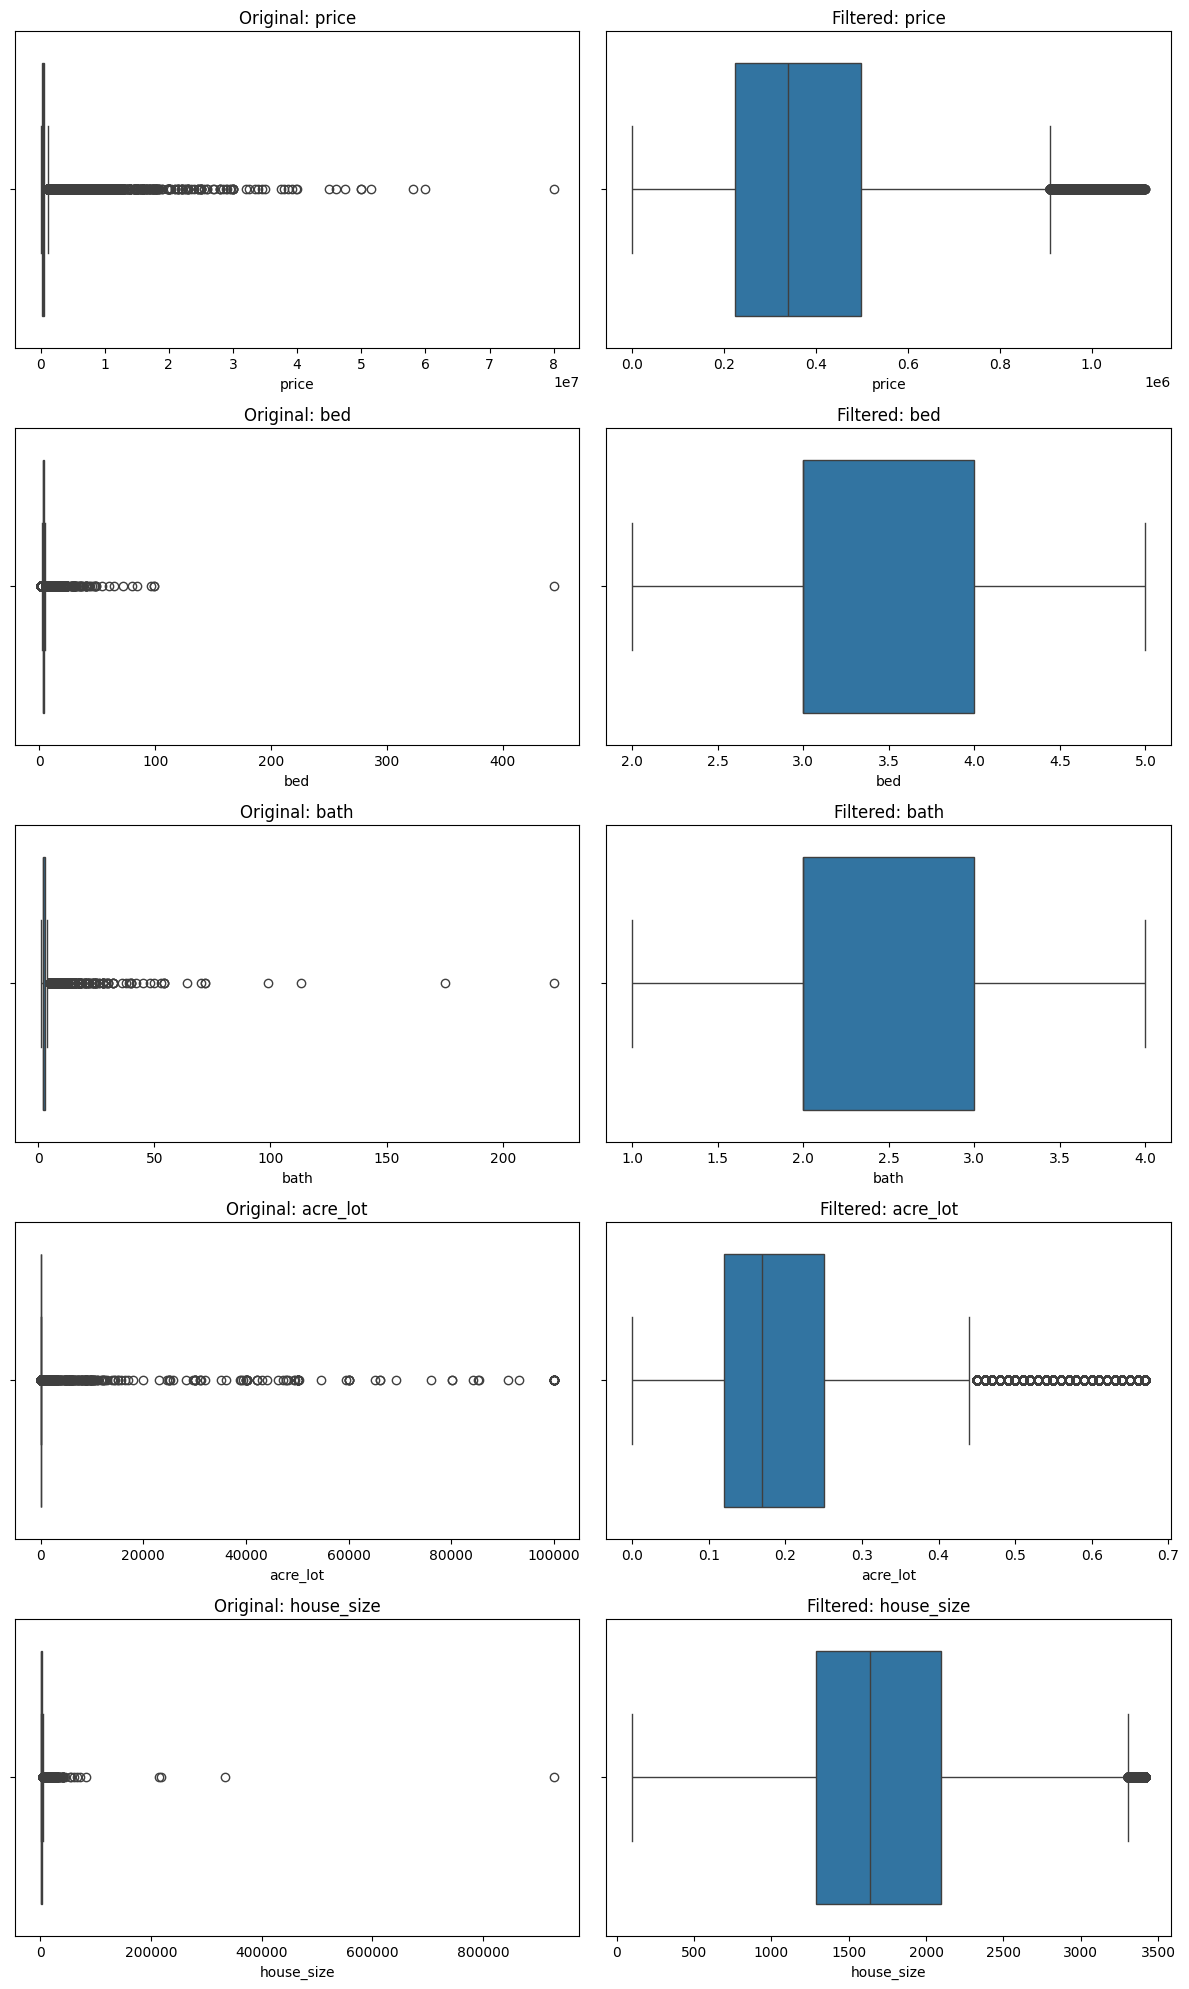

In [23]:
# Effect of removing outliers
def boxplot_compare(df_original, df_filtered, cols):
    fig, axes = plt.subplots(len(cols), 2, figsize=(12, 4 * len(cols)))
    for i, col in enumerate(cols):
        sns.boxplot(x=df_original[col], ax=axes[i][0])
        axes[i][0].set_title(f'Original: {col}')
        sns.boxplot(x=df_filtered[col], ax=axes[i][1])
        axes[i][1].set_title(f'Filtered: {col}')
    plt.tight_layout()
    plt.show()

boxplot_compare(df_sold, df_sold_outlier_removed, columns)

In [24]:
df_sold_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449027 entries, 750602 to 1360345
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           449027 non-null  float64
 1   bed             449027 non-null  int64  
 2   bath            449027 non-null  int64  
 3   acre_lot        449027 non-null  float64
 4   city            449027 non-null  object 
 5   state           449027 non-null  object 
 6   zip_code        449027 non-null  int64  
 7   house_size      449027 non-null  float64
 8   price_per_sqft  449027 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 34.3+ MB


In [25]:
# Distributation of house price by number of beds
fig = px.histogram(df_sold_outlier_removed, x="price", color="bed", nbins=20)
fig.update_layout(title="Distribution of House Price by Bed", xaxis_title="Price", yaxis_title="Count")
fig.show()

In [26]:
# Distribution of house price by number of baths
fig = px.histogram(df_sold_outlier_removed, x="price", color="bath", nbins=20)
fig.update_layout(title="Distribution of House Price by Bath", xaxis_title="Price", yaxis_title="Count")
fig.show()

### USA Real Estate data cleaned

In [27]:
# save the cleaned df to df_real_estate
df_real_estate = df_sold_outlier_removed

## Loading in Zip code to County Dataset

In [67]:
#!/bin/bash
!!kaggle datasets download danofer/zipcodes-county-fips-crosswalk

['Dataset URL: https://www.kaggle.com/datasets/danofer/zipcodes-county-fips-crosswalk',
 'License(s): CC0-1.0',
 'zipcodes-county-fips-crosswalk.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [68]:
!unzip zipcodes-county-fips-crosswalk.zip

Archive:  zipcodes-county-fips-crosswalk.zip
replace ZIP-COUNTY-FIPS_2017-06.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [69]:
zip_county_df = pd.read_csv('ZIP-COUNTY-FIPS_2017-06.csv')
zip_county_df.head(10)

ZIP      COUNTYNAME STATE  STCOUNTYFP CLASSFP
0  36003  Autauga County    AL        1001      H1
1  36006  Autauga County    AL        1001      H1
2  36067  Autauga County    AL        1001      H1
3  36066  Autauga County    AL        1001      H1
4  36703  Autauga County    AL        1001      H1
5  36701  Autauga County    AL        1001      H1
6  36091  Autauga County    AL        1001      H1
7  36051  Autauga County    AL        1001      H1
8  36068  Autauga County    AL        1001      H1
9  36008  Autauga County    AL        1001      H1

In [70]:
zip_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP         52889 non-null  int64 
 1   COUNTYNAME  52889 non-null  object
 2   STATE       52889 non-null  object
 3   STCOUNTYFP  52889 non-null  int64 
 4   CLASSFP     52889 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


## Cleaning up Zip Code to County Dataset

### Duplicates and null checking

In [71]:
zip_county_df.duplicated().sum()

np.int64(0)

In [72]:
total_missing = zip_county_df.isna().sum() * 100 / len(zip_county_df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


ZIP           0.0
COUNTYNAME    0.0
STATE         0.0
STCOUNTYFP    0.0
CLASSFP       0.0
dtype: float64

### Data type casting

In [73]:
# cast date types
zip_county_df = zip_county_df.astype({'ZIP': 'int', 'COUNTYNAME':'str', 'STATE':'str'})

In [74]:
zip_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52889 entries, 0 to 52888
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP         52889 non-null  int64 
 1   COUNTYNAME  52889 non-null  object
 2   STATE       52889 non-null  object
 3   STCOUNTYFP  52889 non-null  int64 
 4   CLASSFP     52889 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.0+ MB


### Column renaming

In [75]:
zip_county_df.rename(columns={'ZIP': 'zip_code', 'COUNTYNAME':'county', 'STATE':'state'}, inplace=True)

### Column Filtering

In [76]:
zip_county_df.drop(columns=['STCOUNTYFP', 'CLASSFP'], inplace=True)

### Row Filtering

In [77]:
# count unique counties per ZIP code
zip_counts = zip_county_df['zip_code'].value_counts()

# Step 1: Find ZIP codes with only one county
zips_one_county = zip_counts[zip_counts == 1].index
# Step 2: Filter out rows with those ZIP codes
zip_county_df = zip_county_df[zip_county_df['zip_code'].isin(zips_one_county)]

In [78]:
zip_county_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29102 entries, 0 to 52888
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   zip_code  29102 non-null  int64 
 1   county    29102 non-null  object
 2   state     29102 non-null  object
dtypes: int64(1), object(2)
memory usage: 909.4+ KB


## Create new column "county" in USA Real Estate Dataset

In [79]:
# Merge df with zip_county_df to get county info
real_estate_df = pd.merge(df_real_estate, zip_county_df, on='zip_code', how='inner')
real_estate_df.drop(columns=['state_x'], inplace=True)
real_estate_df.rename(columns={'state_y':'state'},inplace=True)
real_estate_df.head(10)

price  bed  bath  acre_lot           city  zip_code  house_size  \
0   22500.0    2     1      0.32         Anasco       610       850.0   
1  120000.0    4     2      0.18  Sabana Grande       637      1188.0   
2  133000.0    3     1      0.60        Hatillo       659      1049.0   
3  220000.0    5     3      0.11        Isabela       662      2992.0   
4  175000.0    3     3      0.45     Las Marias       670      3090.0   
5  149000.0    3     2      0.28       Mayaguez       682      2000.0   
6  130000.0    3     2      0.07          Ponce       716      1024.0   
7  140000.0    4     3      0.10        Naguabo       718      2222.0   
8   68900.0    3     1      0.09        Naguabo       718       900.0   
9   57900.0    3     1      0.24          Ponce       731       845.0   

   price_per_sqft                   county state  
0       26.470588         Anasco Municipio    PR  
1      101.010101  Sabana Grande Municipio    PR  
2      126.787417        Hatillo Municipio    PR  
3       73.529412        Isabela Municipio    PR  
4       56.634304     Las Marias Municipio    PR  
5       74.500000       Mayaguez Municipio    PR  
6      126.953125          Ponce Municipio    PR  
7       63.006301        Naguabo Municipio    PR  
8       76.555556        Naguabo Municipio    PR  
9       68.520710          Ponce Municipio    PR

In [80]:
real_estate_df.shape

(338278, 10)

In [81]:
real_estate_df.describe()

price            bed           bath       acre_lot  \
count  3.382780e+05  338278.000000  338278.000000  338278.000000   
mean   3.985179e+05       3.162272       2.236291       0.192204   
std    2.228088e+05       0.754238       0.768575       0.121180   
min    1.000000e+00       2.000000       1.000000       0.000000   
25%    2.350000e+05       3.000000       2.000000       0.120000   
50%    3.500000e+05       3.000000       2.000000       0.170000   
75%    5.200000e+05       4.000000       3.000000       0.240000   
max    1.117000e+06       5.000000       4.000000       0.670000   

            zip_code     house_size  price_per_sqft  
count  338278.000000  338278.000000   338278.000000  
mean    59252.218084    1715.579503      243.412335  
std     30860.386727     580.194862      147.531929  
min       610.000000     100.000000        0.000448  
25%     32505.000000    1275.000000      146.907755  
50%     63301.000000    1622.000000      204.666530  
75%     89439.000000    2071.000000      299.385613  
max     99402.000000    3418.000000     3500.000000

In [82]:
real_estate_df.describe(include = 'object')

city           county   state
count    338278           338278  338278
unique     6438             1147      50
top     Houston  Maricopa County      CA
freq       8452            13488   59085

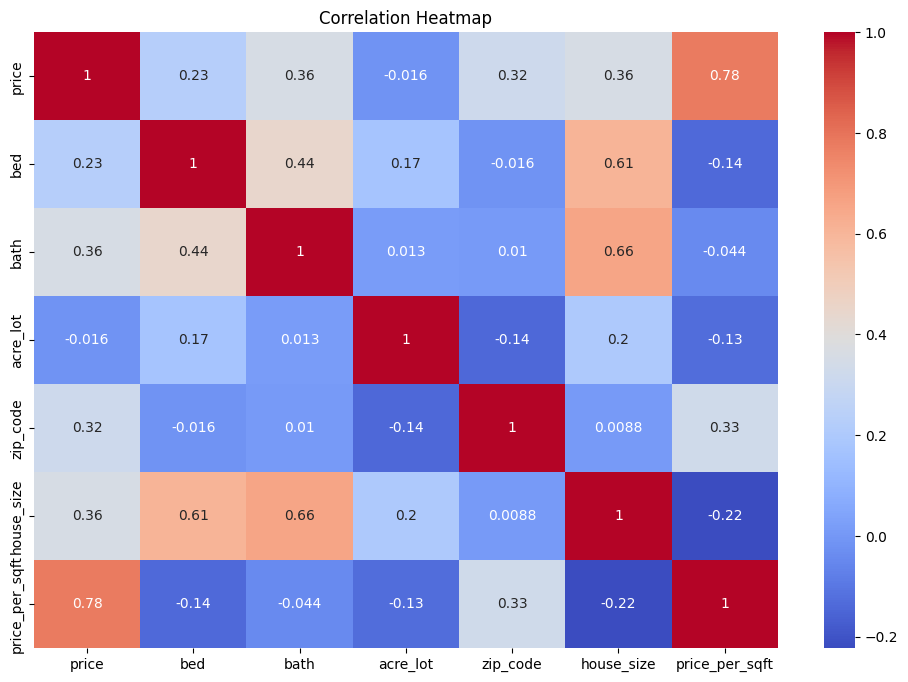

In [83]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(real_estate_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Loading in Zip Code Demographics

In [84]:
#!/bin/bash
!!kaggle datasets download erdi28/zip-codes-demographics

['Dataset URL: https://www.kaggle.com/datasets/erdi28/zip-codes-demographics',
 'License(s): MIT',
 'zip-codes-demographics.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [85]:
!unzip zip-codes-demographics.zip

Archive:  zip-codes-demographics.zip
replace zip_code_demographics.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [86]:
zip_code_demographics_df_raw = pd.read_csv('zip_code_demographics.csv')
zip_code_demographics_df_raw.head(10)

zip       lat       lng          city state_id     state_name  population  \
0  1001  42.06262 -72.62521        Agawam       MA  Massachusetts       16088   
1  1002  42.37633 -72.46462       Amherst       MA  Massachusetts       27323   
2  1005  42.42117 -72.10655         Barre       MA  Massachusetts        4947   
3  1007  42.28163 -72.40009   Belchertown       MA  Massachusetts       15304   
4  1008  42.18234 -72.95819     Blandford       MA  Massachusetts        1171   
5  1010  42.12904 -72.20597     Brimfield       MA  Massachusetts        3703   
6  1011  42.30233 -72.96448       Chester       MA  Massachusetts        1332   
7  1012  42.38495 -72.84675  Chesterfield       MA  Massachusetts         503   
8  1013  42.16059 -72.60788      Chicopee       MA  Massachusetts       22709   
9  1020  42.17618 -72.56538      Chicopee       MA  Massachusetts       30704   

   density county_name  po_box  dist_highway  dist2_large_airport  \
0    550.1     Hampden       0      1.387035           106.145765   
1    198.1   Hampshire       0     14.438177           112.264368   
2     44.2   Worcester       0     16.788339            90.664964   
3    107.7   Hampshire       0     13.663839           101.552921   
4      7.4     Hampden       0      2.593655           136.548797   
5     40.6     Hampden       0      4.737271            78.645500   
6     15.7     Hampden       0      8.058693           142.414627   
7     16.1   Hampshire       0     18.331096           138.381684   
8   1549.1     Hampden       0      0.062286           109.114246   
9    951.4     Hampden       0      0.925140           106.769095   

   dist2_medium_airport  dist_to_shore  number_of_business  \
0             12.946212      93.049251               438.0   
1             21.080079     133.370144               571.0   
2             25.547718      97.639881                97.0   
3             14.762395     114.406034               217.0   
4             20.177950     107.466779                18.0   
5             28.049262      94.928024                73.0   
6             26.041908     128.563170                13.0   
7             27.466664     137.693285                10.0   
8              7.075893     104.576258               317.0   
9              3.205533     105.789421               550.0   

   adjusted_gross_income  total_income_amount  number_of_returns  
0                 598807         6.047690e+05               9320  
1                 989558         1.005796e+06               9880  
2                 164207         1.660540e+05               2490  
3                 647074         6.547390e+05               7970  
4                  47826         4.824100e+04                660  
5                 155666         1.576770e+05               1980  
6                  38223         3.855300e+04                630  
7                  24826         2.510200e+04                410  
8                 516431         5.201740e+05              11270  
9                 828125         8.346140e+05              15760

In [87]:
zip_code_demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33704 entries, 0 to 33703
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zip                    33704 non-null  int64  
 1   lat                    33704 non-null  float64
 2   lng                    33704 non-null  float64
 3   city                   33704 non-null  object 
 4   state_id               33704 non-null  object 
 5   state_name             33704 non-null  object 
 6   population             33704 non-null  int64  
 7   density                33704 non-null  float64
 8   county_name            33704 non-null  object 
 9   po_box                 33704 non-null  int64  
 10  dist_highway           33704 non-null  float64
 11  dist2_large_airport    33704 non-null  float64
 12  dist2_medium_airport   33704 non-null  float64
 13  dist_to_shore          33704 non-null  float64
 14  number_of_business     33624 non-null  float64
 15  ad

In [88]:
zip_code_demographics_df_raw.describe()

zip           lat           lng     population       density  \
count  33704.000000  33704.000000  33704.000000   33704.000000  33704.000000   
mean   49842.607821     38.888195    -91.051366   11287.959738    528.704068   
std    27451.111442      5.228075     15.460095   15200.216997   2219.277025   
min     1001.000000    -14.219840   -176.629620       0.000000      0.000000   
25%    27052.750000     35.427243    -97.255342    1253.750000      8.200000   
50%    49780.500000     39.502970    -88.224820    4099.000000     29.000000   
75%    72210.250000     42.110000    -80.289333   16113.250000    238.825000   
max    99929.000000     71.274340    144.876370  130352.000000  68424.500000   

             po_box  dist_highway  dist2_large_airport  dist2_medium_airport  \
count  33704.000000  33704.000000         33704.000000          33704.000000   
mean       0.179949     29.291294           158.648048             40.854624   
std        0.384151    174.104869           166.207042             80.224956   
min        0.000000      0.000194             0.112768              0.134153   
25%        0.000000      3.050420            59.434074             19.513217   
50%        0.000000     11.541912           125.957938             35.131017   
75%        0.000000     30.046597           209.476362             55.231087   
max        1.000000  10767.713382          6127.454722           5101.697518   

       dist_to_shore  number_of_business  adjusted_gross_income  \
count   33704.000000        33624.000000           3.370400e+04   
mean      304.798736          260.694920           4.251341e+05   
std       298.948686          432.112814           7.561519e+05   
min         0.011449            1.000000           5.770000e+02   
25%        61.286177           19.000000           3.247500e+04   
50%       207.328858           74.000000           1.128665e+05   
75%       471.857289          334.000000           5.052290e+05   
max      1336.551268         7263.000000           1.522467e+07   

       total_income_amount  number_of_returns  
count         3.370400e+04       33704.000000  
mean          4.298943e+05        5341.873665  
std           7.644416e+05        7273.613660  
min           5.770000e+02          90.000000  
25%           3.287925e+04         580.000000  
50%           1.140365e+05        1880.000000  
75%           5.092270e+05        7560.000000  
max           1.527798e+07       61920.000000

In [89]:
zip_code_demographics_df_raw.describe(include = 'object')

city state_id state_name county_name
count     33704    33704      33704       33704
unique    17551       51         51        1800
top     Houston       TX      Texas  Washington
freq        106     1990       1990         401

## Cleaning Zip Code Demographics Data

In [90]:
zip_code_demographics_df_raw.duplicated().sum()

np.int64(0)

In [91]:
# Keep only the necessary columns
zip_code_demographics_df = zip_code_demographics_df_raw [['zip', 'population', 'density', 'dist_highway', 'dist2_large_airport', 'dist_to_shore', 'number_of_business', 'adjusted_gross_income']]

In [92]:
total_missing = zip_code_demographics_df.isna().sum() * 100 / len(zip_code_demographics_df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


zip                      0.000000
population               0.000000
density                  0.000000
dist_highway             0.000000
dist2_large_airport      0.000000
dist_to_shore            0.000000
number_of_business       0.237361
adjusted_gross_income    0.000000
dtype: float64

In [93]:
# Drop nulls
zip_code_demographics_df = zip_code_demographics_df.dropna()
# Reset and drop the index
zip_code_demographics_df = zip_code_demographics_df.reset_index(drop=True)

In [94]:
total_missing = zip_code_demographics_df.isna().sum() * 100 / len(zip_code_demographics_df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


zip                      0.0
population               0.0
density                  0.0
dist_highway             0.0
dist2_large_airport      0.0
dist_to_shore            0.0
number_of_business       0.0
adjusted_gross_income    0.0
dtype: float64

In [95]:
# cast date types
zip_code_demographics_df = zip_code_demographics_df.astype({'zip': 'int', 'population': 'float', 'density': 'float', 'dist_highway': 'float', 'dist2_large_airport': 'float', 'dist_to_shore': 'float', 'number_of_business': 'float', 'adjusted_gross_income': 'float'})

In [96]:
zip_code_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33624 entries, 0 to 33623
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zip                    33624 non-null  int64  
 1   population             33624 non-null  float64
 2   density                33624 non-null  float64
 3   dist_highway           33624 non-null  float64
 4   dist2_large_airport    33624 non-null  float64
 5   dist_to_shore          33624 non-null  float64
 6   number_of_business     33624 non-null  float64
 7   adjusted_gross_income  33624 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 2.1 MB


In [97]:
zip_code_demographics_df.rename(columns={'zip': 'zip_code'}, inplace=True)

## Merge real_estate_df with zip_code_demographics_df to add the zip code related features

In [98]:
real_estate_features_df = pd.merge(real_estate_df, zip_code_demographics_df, on='zip_code', how='inner')
real_estate_features_df.head(10)

price  bed  bath  acre_lot          city  zip_code  house_size  \
0  215000.0    3     2      0.19      Chicopee      1020      1828.0   
1  269900.0    2     1      0.46  South Hadley      1075      1312.0   
2  314900.0    5     2      0.28      Chicopee      1013      2219.0   
3  244999.0    4     1      0.23   Springfield      1104      1285.0   
4  399900.0    3     3      0.35   Easthampton      1027      1380.0   
5  198000.0    2     1      0.14       Holyoke      1040       768.0   
6  299900.0    3     1      0.40   Easthampton      1027      1424.0   
7  279000.0    3     1      0.23        Ludlow      1056      1164.0   
8  319900.0    3     1      0.41   Northampton      1062       864.0   
9  264900.0    3     2      0.40       Holyoke      1040      1776.0   

   price_per_sqft            county state  population  density  dist_highway  \
0      117.614880    Hampden County    MA     30704.0    951.4      0.925140   
1      205.716463  Hampshire County    MA     18051.0    393.3      2.910859   
2      141.910771    Hampden County    MA     22709.0   1549.1      0.062286   
3      190.660700    Hampden County    MA     23226.0   1714.0      0.645911   
4      289.782609  Hampshire County    MA     17708.0    168.5      9.873599   
5      257.812500    Hampden County    MA     38480.0    702.0      0.598474   
6      210.603933  Hampshire County    MA     17708.0    168.5      9.873599   
7      239.690722    Hampden County    MA     21050.0    298.9      2.608102   
8      370.254630  Hampshire County    MA      9835.0    217.6      3.630387   
9      149.155405    Hampden County    MA     38480.0    702.0      0.598474   

   dist2_large_airport  dist_to_shore  number_of_business  \
0           106.769095     105.789421               550.0   
1           112.181953     115.181126               297.0   
2           109.114246     104.576258               317.0   
3           104.785728     101.063511               528.0   
4           125.949999     124.367513               372.0   
5           114.170265     111.173366               907.0   
6           125.949999     124.367513               372.0   
7            99.921771     105.057502               412.0   
8           122.235452     124.761768               191.0   
9           114.170265     111.173366               907.0   

   adjusted_gross_income  
0               828125.0  
1               697896.0  
2               516431.0  
3               453300.0  
4               671249.0  
5               832429.0  
6               671249.0  
7               747067.0  
8               639133.0  
9               832429.0

In [99]:
real_estate_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338148 entries, 0 to 338147
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   price                  338148 non-null  float64
 1   bed                    338148 non-null  int64  
 2   bath                   338148 non-null  int64  
 3   acre_lot               338148 non-null  float64
 4   city                   338148 non-null  object 
 5   zip_code               338148 non-null  int64  
 6   house_size             338148 non-null  float64
 7   price_per_sqft         338148 non-null  float64
 8   county                 338148 non-null  object 
 9   state                  338148 non-null  object 
 10  population             338148 non-null  float64
 11  density                338148 non-null  float64
 12  dist_highway           338148 non-null  float64
 13  dist2_large_airport    338148 non-null  float64
 14  dist_to_shore          338148 non-nu

In [100]:
real_estate_features_df.describe()

price            bed           bath       acre_lot  \
count  3.381480e+05  338148.000000  338148.000000  338148.000000   
mean   3.985160e+05       3.162272       2.236263       0.192209   
std    2.227892e+05       0.754211       0.768534       0.121162   
min    1.000000e+00       2.000000       1.000000       0.000000   
25%    2.350000e+05       3.000000       2.000000       0.120000   
50%    3.500000e+05       3.000000       2.000000       0.170000   
75%    5.200000e+05       4.000000       3.000000       0.240000   
max    1.117000e+06       5.000000       4.000000       0.670000   

            zip_code     house_size  price_per_sqft     population  \
count  338148.000000  338148.000000   338148.000000  338148.000000   
mean    59261.692052    1715.619681      243.411869   35183.865905   
std     30852.169233     580.190767      147.534047   19180.403151   
min      1001.000000     100.000000        0.000448       0.000000   
25%     32506.000000    1275.000000      146.914704   21670.000000   
50%     63301.000000    1622.000000      204.662721   33096.000000   
75%     89439.000000    2071.000000      299.365064   45792.000000   
max     99402.000000    3418.000000     3500.000000  130352.000000   

             density   dist_highway  dist2_large_airport  dist_to_shore  \
count  338148.000000  338148.000000        338148.000000  338148.000000   
mean     1205.825783       6.331339            78.152613     187.680797   
std      1350.849182      12.922188           103.741284     239.755605   
min         0.000000       0.000283             0.424420       0.011449   
25%       293.500000       1.328307            19.921847      20.759234   
50%       867.800000       2.829334            36.951682      73.724405   
75%      1695.200000       5.967586            92.247183     314.774612   
max     49565.300000     299.940968           994.951376    1330.442647   

       number_of_business  adjusted_gross_income  
count       338148.000000           3.381480e+05  
mean           678.352136           1.261296e+06  
std            468.528140           9.092380e+05  
min              1.000000           2.925000e+03  
25%            335.000000           6.438270e+05  
50%            586.000000           1.074226e+06  
75%            916.000000           1.632569e+06  
max           7263.000000           1.207523e+07

In [101]:
real_estate_features_df.describe(include = 'object')

city           county   state
count    338148           338148  338148
unique     6399             1126      48
top     Houston  Maricopa County      CA
freq       8452            13488   59048

Import Library


In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
import datetime as dt
import requests
from lxml import html
import math
import json
import re
import os

# 1. County Demographics Data Cleaning and Wrangling


## 1.1 Loading County Demogrphics Dataset

In [103]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("glozab/county-level-us-demographic-data-1990-2020")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/glozab/county-level-us-demographic-data-1990-2020/versions/1


In [104]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['county_demographics.csv']


In [105]:
file_path = os.path.join(path, 'county_demographics.csv')
county_demographics_df_raw = pd.read_csv(file_path)

print(county_demographics_df_raw.head())

   year  fips  population  w_population  b_population  o_population  \
0  1990  1025       27289         15579         11643            35   
1  1990  1031       40293         32869          6950           160   
2  1990  1041       13598         10068          3516            11   
3  1990  1053       35526         24377         10050          1045   
4  1990  1101      209537        119702         87856           415   

   nh_population  hi_population  na_population  male_population  ...  \
0          27196             93              0            13052  ...   
1          39831            462              0            19673  ...   
2          13576             22              0             6421  ...   
3          35378            148              0            17454  ...   
4         207933           1604              0            98854  ...   

   age9_population_ratio  age10_population_ratio  age11_population_ratio  \
0                0.06263                 0.05552                

## 1.2 County Demographics Dataset Cleaning

In [106]:
county_demographics_df_raw.dtypes

year                         int64
fips                         int64
population                   int64
w_population                 int64
b_population                 int64
o_population                 int64
nh_population                int64
hi_population                int64
na_population                int64
male_population              int64
female_population            int64
age0_population              int64
age1_population              int64
age2_population              int64
age3_population              int64
age4_population              int64
age5_population              int64
age6_population              int64
age7_population              int64
age8_population              int64
age9_population              int64
age10_population             int64
age11_population             int64
age12_population             int64
age13_population             int64
age14_population             int64
age15_population             int64
age16_population             int64
age17_population             int64
age18_population             int64
w_population_ratio         float64
b_population_ratio         float64
o_population_ratio         float64
nh_population_ratio        float64
hi_population_ratio        float64
na_population_ratio        float64
male_population_ratio      float64
female_population_ratio    float64
age0_population_ratio      float64
age1_population_ratio      float64
age2_population_ratio      float64
age3_population_ratio      float64
age4_population_ratio      float64
age5_population_ratio      float64
age6_population_ratio      float64
age7_population_ratio      float64
age8_population_ratio      float64
age9_population_ratio      float64
age10_population_ratio     float64
age11_population_ratio     float64
age12_population_ratio     float64
age13_population_ratio     float64
age14_population_ratio     float64
age15_population_ratio     float64
age16_population_ratio     float64
age17_population_ratio     float64
age18_population_ratio     float64
dtype: object

In [107]:
county_demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     97287 non-null  int64  
 1   fips                     97287 non-null  int64  
 2   population               97287 non-null  int64  
 3   w_population             97287 non-null  int64  
 4   b_population             97287 non-null  int64  
 5   o_population             97287 non-null  int64  
 6   nh_population            97287 non-null  int64  
 7   hi_population            97287 non-null  int64  
 8   na_population            97287 non-null  int64  
 9   male_population          97287 non-null  int64  
 10  female_population        97287 non-null  int64  
 11  age0_population          97287 non-null  int64  
 12  age1_population          97287 non-null  int64  
 13  age2_population          97287 non-null  int64  
 14  age3_population       

In [108]:
county_demographics_df_raw.isna().sum().sort_values(ascending=False)

year                       0
fips                       0
population                 0
w_population               0
b_population               0
o_population               0
nh_population              0
hi_population              0
na_population              0
male_population            0
female_population          0
age0_population            0
age1_population            0
age2_population            0
age3_population            0
age4_population            0
age5_population            0
age6_population            0
age7_population            0
age8_population            0
age9_population            0
age10_population           0
age11_population           0
age12_population           0
age13_population           0
age14_population           0
age15_population           0
age16_population           0
age17_population           0
age18_population           0
w_population_ratio         0
b_population_ratio         0
o_population_ratio         0
nh_population_ratio        0
hi_population_ratio        0
na_population_ratio        0
male_population_ratio      0
female_population_ratio    0
age0_population_ratio      0
age1_population_ratio      0
age2_population_ratio      0
age3_population_ratio      0
age4_population_ratio      0
age5_population_ratio      0
age6_population_ratio      0
age7_population_ratio      0
age8_population_ratio      0
age9_population_ratio      0
age10_population_ratio     0
age11_population_ratio     0
age12_population_ratio     0
age13_population_ratio     0
age14_population_ratio     0
age15_population_ratio     0
age16_population_ratio     0
age17_population_ratio     0
age18_population_ratio     0
dtype: int64

In [109]:
# keep the necessary columns
county_demographics_df_raw = county_demographics_df_raw.drop(columns = ['population', 'female_population', 'male_population', 'w_population', 'b_population', 'o_population', 'nh_population', 'hi_population', 'na_population',
                                           'age0_population', 'age1_population', 'age2_population', 'age3_population', 'age4_population', 'age5_population',
                                           'age6_population', 'age7_population', 'age8_population', 'age9_population', 'age10_population', 'age11_population',
                                           'age12_population', 'age13_population', 'age14_population', 'age15_population', 'age16_population', 'age17_population',
                                           'age18_population'])

In [110]:
county_demographics_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     97287 non-null  int64  
 1   fips                     97287 non-null  int64  
 2   w_population_ratio       97287 non-null  float64
 3   b_population_ratio       97287 non-null  float64
 4   o_population_ratio       97287 non-null  float64
 5   nh_population_ratio      97287 non-null  float64
 6   hi_population_ratio      97287 non-null  float64
 7   na_population_ratio      97287 non-null  float64
 8   male_population_ratio    97287 non-null  float64
 9   female_population_ratio  97287 non-null  float64
 10  age0_population_ratio    97287 non-null  float64
 11  age1_population_ratio    97287 non-null  float64
 12  age2_population_ratio    97287 non-null  float64
 13  age3_population_ratio    97287 non-null  float64
 14  age4_population_ratio 

### Rename Columns for Consistency

In [111]:
county_demographics_df_raw.columns = county_demographics_df_raw.columns.str.strip().str.lower().str.replace(' ', '_')

In [112]:
# Rename age groups
county_demographics_df_renamed = county_demographics_df_raw
county_demographics_df_renamed.rename(
    columns=
     {
    'w_population_ratio': 'caucasion_population_ratio',
    'b_population_ratio': 'African-American_population_ratio',
    'o_population_ratio': 'other_race_population_ratio',
    'nh_population_ratio':'non-Hispanic_population_ratio',
    'hi_population_ratio':'hispanic_population_ratio',
    'na_population_ratio':'other_origin_population_ratio',
    'age0_population_ratio':'age_less_1_population_ratio',
    'age1_population_ratio':'age_1_to_4_population_ratio',
    'age2_population_ratio':'age_5_to_9_population_ratio',
    'age3_population_ratio':'age_10_to_14_population_ratio',
    'age4_population_ratio':'age_15_to_19_population_ratio',
    'age5_population_ratio':'age_20_to_24_population_ratio',
    'age6_population_ratio':'age_25_to_29_population_ratio',
    'age7_population_ratio':'age_30_to_34_population_ratio',
    'age8_population_ratio':'age_35_to_39_population_ratio',
    'age9_population_ratio':'age_40_to_44_population_ratio',
    'age10_population_ratio':'age_45_to_49_population_ratio',
    'age11_population_ratio':'age_50_to_54_population_ratio',
    'age12_population_ratio':'age_55_to_59_population_ratio',
    'age13_population_ratio':'age_60_to_64_population_ratio',
    'age14_population_ratio':'age_65_to_69_population_ratio',
    'age15_population_ratio':'age_70_to_74_population_ratio',
    'age16_population_ratio':'age_75_to_79_population_ratio',
    'age17_population_ratio':'age_80_to_84_population_ratio',
    'age18_population_ratio':'age_85_and_over_population_ratio'
    }, inplace=True)

In [113]:
county_demographics_df_renamed.reset_index(drop=True, inplace=True)

In [114]:
county_demographics_df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97287 non-null  int64  
 1   fips                               97287 non-null  int64  
 2   caucasion_population_ratio         97287 non-null  float64
 3   African-American_population_ratio  97287 non-null  float64
 4   other_race_population_ratio        97287 non-null  float64
 5   non-Hispanic_population_ratio      97287 non-null  float64
 6   hispanic_population_ratio          97287 non-null  float64
 7   other_origin_population_ratio      97287 non-null  float64
 8   male_population_ratio              97287 non-null  float64
 9   female_population_ratio            97287 non-null  float64
 10  age_less_1_population_ratio        97287 non-null  float64
 11  age_1_to_4_population_ratio        97287 non-null  flo

In [115]:
county_demographics_df_renamed['age_0_to_19_population_ratio'] = county_demographics_df_renamed[[
    'age_less_1_population_ratio',
    'age_1_to_4_population_ratio',
    'age_5_to_9_population_ratio',
    'age_10_to_14_population_ratio',
    'age_15_to_19_population_ratio']].sum(axis=1)

In [116]:
county_demographics_df_renamed['age_20_to_39_population_ratio'] = county_demographics_df_renamed[[
    'age_20_to_24_population_ratio',
    'age_25_to_29_population_ratio',
    'age_30_to_34_population_ratio',
    'age_35_to_39_population_ratio']].sum(axis=1)

In [117]:
county_demographics_df_renamed['age_40_to_59_population_ratio'] = county_demographics_df_renamed[[
    'age_40_to_44_population_ratio',
    'age_45_to_49_population_ratio',
    'age_50_to_54_population_ratio',
    'age_55_to_59_population_ratio']].sum(axis=1)

In [118]:
county_demographics_df_renamed['age_60_to_79_population_ratio'] = county_demographics_df_renamed[[
    'age_60_to_64_population_ratio',
    'age_65_to_69_population_ratio',
    'age_70_to_74_population_ratio',
    'age_75_to_79_population_ratio']].sum(axis=1)

In [119]:
county_demographics_df_renamed['age_80_and_over_population_ratio'] = county_demographics_df_renamed[[
    'age_80_to_84_population_ratio',
    'age_85_and_over_population_ratio']].sum(axis=1)

In [120]:
county_demographics_grouped_df = county_demographics_df_renamed[['year',
                                                                 'fips',
                                                                 'caucasion_population_ratio',
                                                                 'African-American_population_ratio',
                                                                 'other_race_population_ratio',
                                                                 'non-Hispanic_population_ratio',
                                                                 'hispanic_population_ratio',
                                                                 'male_population_ratio',
                                                                 'female_population_ratio',
                                                                 'age_0_to_19_population_ratio',
                                                                 'age_20_to_39_population_ratio',
                                                                 'age_40_to_59_population_ratio',
                                                                 'age_60_to_79_population_ratio',
                                                                 'age_80_and_over_population_ratio'
                                                                ]]

In [121]:
county_demographics_grouped_df.head()

year  fips  caucasion_population_ratio  African-American_population_ratio  \
0  1990  1025                     0.57089                            0.42666   
1  1990  1031                     0.81575                            0.17249   
2  1990  1041                     0.74040                            0.25857   
3  1990  1053                     0.68617                            0.28289   
4  1990  1101                     0.57127                            0.41929   

   other_race_population_ratio  non-Hispanic_population_ratio  \
0                      0.00128                        0.99659   
1                      0.00397                        0.98853   
2                      0.00081                        0.99838   
3                      0.02942                        0.99583   
4                      0.00198                        0.99235   

   hispanic_population_ratio  male_population_ratio  female_population_ratio  \
0                    0.00341                0.47829                  0.52171   
1                    0.01147                0.48825                  0.51175   
2                    0.00162                0.47220                  0.52780   
3                    0.00417                0.49130                  0.50870   
4                    0.00765                0.47177                  0.52823   

   age_0_to_19_population_ratio  age_20_to_39_population_ratio  \
0                       0.33075                        0.28386   
1                       0.28436                        0.30236   
2                       0.29334                        0.26210   
3                       0.29682                        0.29283   
4                       0.30814                        0.32970   

   age_40_to_59_population_ratio  age_60_to_79_population_ratio  \
0                        0.21295                        0.14083   
1                        0.23560                        0.14849   
2                        0.21275                        0.18886   
3                        0.22459                        0.15266   
4                        0.20688                        0.12899   

   age_80_and_over_population_ratio  
0                           0.03162  
1                           0.02918  
2                           0.04295  
3                           0.03310  
4                           0.02628

In [122]:
county_demographics_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97287 non-null  int64  
 1   fips                               97287 non-null  int64  
 2   caucasion_population_ratio         97287 non-null  float64
 3   African-American_population_ratio  97287 non-null  float64
 4   other_race_population_ratio        97287 non-null  float64
 5   non-Hispanic_population_ratio      97287 non-null  float64
 6   hispanic_population_ratio          97287 non-null  float64
 7   male_population_ratio              97287 non-null  float64
 8   female_population_ratio            97287 non-null  float64
 9   age_0_to_19_population_ratio       97287 non-null  float64
 10  age_20_to_39_population_ratio      97287 non-null  float64
 11  age_40_to_59_population_ratio      97287 non-null  flo

 ### Handle Duplicates

In [123]:
county_demographics_df = county_demographics_grouped_df.drop_duplicates()
county_demographics_df = county_demographics_df.dropna()
county_demographics_df.head()

year  fips  caucasion_population_ratio  African-American_population_ratio  \
0  1990  1025                     0.57089                            0.42666   
1  1990  1031                     0.81575                            0.17249   
2  1990  1041                     0.74040                            0.25857   
3  1990  1053                     0.68617                            0.28289   
4  1990  1101                     0.57127                            0.41929   

   other_race_population_ratio  non-Hispanic_population_ratio  \
0                      0.00128                        0.99659   
1                      0.00397                        0.98853   
2                      0.00081                        0.99838   
3                      0.02942                        0.99583   
4                      0.00198                        0.99235   

   hispanic_population_ratio  male_population_ratio  female_population_ratio  \
0                    0.00341                0.47829                  0.52171   
1                    0.01147                0.48825                  0.51175   
2                    0.00162                0.47220                  0.52780   
3                    0.00417                0.49130                  0.50870   
4                    0.00765                0.47177                  0.52823   

   age_0_to_19_population_ratio  age_20_to_39_population_ratio  \
0                       0.33075                        0.28386   
1                       0.28436                        0.30236   
2                       0.29334                        0.26210   
3                       0.29682                        0.29283   
4                       0.30814                        0.32970   

   age_40_to_59_population_ratio  age_60_to_79_population_ratio  \
0                        0.21295                        0.14083   
1                        0.23560                        0.14849   
2                        0.21275                        0.18886   
3                        0.22459                        0.15266   
4                        0.20688                        0.12899   

   age_80_and_over_population_ratio  
0                           0.03162  
1                           0.02918  
2                           0.04295  
3                           0.03310  
4                           0.02628

In [124]:
county_demographics_df.describe()

year          fips  caucasion_population_ratio  \
count  97287.000000  97287.000000                97287.000000   
mean    2005.009436  30412.859950                    0.873184   
std        8.942825  15147.842995                    0.162454   
min     1990.000000   1001.000000                    0.026820   
25%     1997.000000  18183.000000                    0.831025   
50%     2005.000000  29179.000000                    0.944570   
75%     2013.000000  45083.000000                    0.979380   
max     2020.000000  99999.000000                    1.000000   

       African-American_population_ratio  other_race_population_ratio  \
count                       97287.000000                 97287.000000   
mean                            0.092728                     0.021730   
std                             0.146201                     0.079129   
min                             0.000000                     0.000000   
25%                             0.006920                     0.002340   
50%                             0.023300                     0.004520   
75%                             0.107380                     0.010520   
max                             0.871530                     0.971690   

       non-Hispanic_population_ratio  hispanic_population_ratio  \
count                   97287.000000               97287.000000   
mean                        0.928248                   0.071752   
std                         0.127350                   0.127350   
min                         0.022170                   0.000000   
25%                         0.933745                   0.010840   
50%                         0.975160                   0.024840   
75%                         0.989160                   0.066255   
max                         1.000000                   0.977830   

       male_population_ratio  female_population_ratio  \
count           97287.000000             97287.000000   
mean                0.497252                 0.502748   
std                 0.020924                 0.020924   
min                 0.426270                 0.263150   
25%                 0.486570                 0.497950   
50%                 0.493810                 0.506190   
75%                 0.502050                 0.513430   
max                 0.736850                 0.573730   

       age_0_to_19_population_ratio  age_20_to_39_population_ratio  \
count                  97287.000000                   97287.000000   
mean                       0.271176                       0.252334   
std                        0.039014                       0.047064   
min                        0.000000                       0.091950   
25%                        0.248120                       0.221490   
50%                        0.270190                       0.248140   
75%                        0.292315                       0.278560   
max                        0.506840                       0.576100   

       age_40_to_59_population_ratio  age_60_to_79_population_ratio  \
count                   97287.000000                   97287.000000   
mean                        0.261087                       0.173507   
std                         0.032236                       0.046070   
min                         0.071020                       0.016920   
25%                         0.239750                       0.142610   
50%                         0.262900                       0.168900   
75%                         0.282740                       0.199930   
max                         0.537630                       0.556150   

       age_80_and_over_population_ratio  
count                      97287.000000  
mean                           0.041897  
std                            0.015786  
min                            0.000000  
25%                            0.031370  
50%                            0.039750  
75%                            0.049880  
max                            0.252870

## 1.2 Loading Fips Code DataSet




In [125]:
# Loading county df data from google drive
fips_df = pd.read_csv('/content/drive/MyDrive/CIS 5450 Group Project/data_sets/state_and_county_fips_master.csv')

In [126]:
fips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fips    3195 non-null   int64 
 1   name    3195 non-null   object
 2   state   3143 non-null   object
dtypes: int64(1), object(2)
memory usage: 75.0+ KB


## 1.3 Merging the county_demographics_df with fips_df

In [127]:
county_demographics_merged_df = county_demographics_df.merge(
    fips_df,
    on='fips',
    how='left'
)
county_demographics_merged_df.head()

year  fips  caucasion_population_ratio  African-American_population_ratio  \
0  1990  1025                     0.57089                            0.42666   
1  1990  1031                     0.81575                            0.17249   
2  1990  1041                     0.74040                            0.25857   
3  1990  1053                     0.68617                            0.28289   
4  1990  1101                     0.57127                            0.41929   

   other_race_population_ratio  non-Hispanic_population_ratio  \
0                      0.00128                        0.99659   
1                      0.00397                        0.98853   
2                      0.00081                        0.99838   
3                      0.02942                        0.99583   
4                      0.00198                        0.99235   

   hispanic_population_ratio  male_population_ratio  female_population_ratio  \
0                    0.00341                0.47829                  0.52171   
1                    0.01147                0.48825                  0.51175   
2                    0.00162                0.47220                  0.52780   
3                    0.00417                0.49130                  0.50870   
4                    0.00765                0.47177                  0.52823   

   age_0_to_19_population_ratio  age_20_to_39_population_ratio  \
0                       0.33075                        0.28386   
1                       0.28436                        0.30236   
2                       0.29334                        0.26210   
3                       0.29682                        0.29283   
4                       0.30814                        0.32970   

   age_40_to_59_population_ratio  age_60_to_79_population_ratio  \
0                        0.21295                        0.14083   
1                        0.23560                        0.14849   
2                        0.21275                        0.18886   
3                        0.22459                        0.15266   
4                        0.20688                        0.12899   

   age_80_and_over_population_ratio               name state  
0                           0.03162      Clarke County    AL  
1                           0.02918      Coffee County    AL  
2                           0.04295    Crenshaw County    AL  
3                           0.03310    Escambia County    AL  
4                           0.02628  Montgomery County    AL

### Sanity Check After Merging

In [128]:
print(county_demographics_merged_df.columns)         # See all columns
print(county_demographics_merged_df[['fips', 'name']].head())  # Confirm correct matches
print(county_demographics_merged_df.isna().sum())    # Check for unmatched FIPS

Index(['year', 'fips', 'caucasion_population_ratio',
       'African-American_population_ratio', 'other_race_population_ratio',
       'non-Hispanic_population_ratio', 'hispanic_population_ratio',
       'male_population_ratio', 'female_population_ratio',
       'age_0_to_19_population_ratio', 'age_20_to_39_population_ratio',
       'age_40_to_59_population_ratio', 'age_60_to_79_population_ratio',
       'age_80_and_over_population_ratio', 'name', 'state'],
      dtype='object')
   fips               name
0  1025      Clarke County
1  1031      Coffee County
2  1041    Crenshaw County
3  1053    Escambia County
4  1101  Montgomery County
year                                   0
fips                                   0
caucasion_population_ratio             0
African-American_population_ratio      0
other_race_population_ratio            0
non-Hispanic_population_ratio          0
hispanic_population_ratio              0
male_population_ratio                  0
female_population_ratio   

## 1.4 Cleaning the Merged Data

Checking for unmatched FIPS — that output tells us 174 rows in the county_demographics_df didn't find a match in fips_df, because name, state, and any other info from fips_df came back as NaN.

In [129]:
unmatched = county_demographics_merged_df[county_demographics_merged_df['name'].isna()]
print(unmatched['fips'].unique()[:10])

[ 2910  4910 51917  8911  2201  8912  8913  2280  2232  2010]


In [130]:
county_demographics_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97287 entries, 0 to 97286
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97287 non-null  int64  
 1   fips                               97287 non-null  int64  
 2   caucasion_population_ratio         97287 non-null  float64
 3   African-American_population_ratio  97287 non-null  float64
 4   other_race_population_ratio        97287 non-null  float64
 5   non-Hispanic_population_ratio      97287 non-null  float64
 6   hispanic_population_ratio          97287 non-null  float64
 7   male_population_ratio              97287 non-null  float64
 8   female_population_ratio            97287 non-null  float64
 9   age_0_to_19_population_ratio       97287 non-null  float64
 10  age_20_to_39_population_ratio      97287 non-null  float64
 11  age_40_to_59_population_ratio      97287 non-null  flo

Drop the unmatched rows.

In [131]:
county_demographics_merged_df = county_demographics_merged_df[county_demographics_merged_df['name'].notna()].reset_index(drop=True)
county_demographics_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97113 entries, 0 to 97112
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97113 non-null  int64  
 1   fips                               97113 non-null  int64  
 2   caucasion_population_ratio         97113 non-null  float64
 3   African-American_population_ratio  97113 non-null  float64
 4   other_race_population_ratio        97113 non-null  float64
 5   non-Hispanic_population_ratio      97113 non-null  float64
 6   hispanic_population_ratio          97113 non-null  float64
 7   male_population_ratio              97113 non-null  float64
 8   female_population_ratio            97113 non-null  float64
 9   age_0_to_19_population_ratio       97113 non-null  float64
 10  age_20_to_39_population_ratio      97113 non-null  float64
 11  age_40_to_59_population_ratio      97113 non-null  flo

In [132]:
county_demographics_merged_df = county_demographics_merged_df.rename(columns={'name': 'county'})
county_demographics_merged_df = county_demographics_merged_df.dropna()
county_demographics_merged_df = county_demographics_merged_df.drop_duplicates()
county_demographics_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97113 entries, 0 to 97112
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               97113 non-null  int64  
 1   fips                               97113 non-null  int64  
 2   caucasion_population_ratio         97113 non-null  float64
 3   African-American_population_ratio  97113 non-null  float64
 4   other_race_population_ratio        97113 non-null  float64
 5   non-Hispanic_population_ratio      97113 non-null  float64
 6   hispanic_population_ratio          97113 non-null  float64
 7   male_population_ratio              97113 non-null  float64
 8   female_population_ratio            97113 non-null  float64
 9   age_0_to_19_population_ratio       97113 non-null  float64
 10  age_20_to_39_population_ratio      97113 non-null  float64
 11  age_40_to_59_population_ratio      97113 non-null  flo

## Result of county demographics df from year 1990 to 2020

In [133]:
county_demographics_merged_df.head()

year  fips  caucasion_population_ratio  African-American_population_ratio  \
0  1990  1025                     0.57089                            0.42666   
1  1990  1031                     0.81575                            0.17249   
2  1990  1041                     0.74040                            0.25857   
3  1990  1053                     0.68617                            0.28289   
4  1990  1101                     0.57127                            0.41929   

   other_race_population_ratio  non-Hispanic_population_ratio  \
0                      0.00128                        0.99659   
1                      0.00397                        0.98853   
2                      0.00081                        0.99838   
3                      0.02942                        0.99583   
4                      0.00198                        0.99235   

   hispanic_population_ratio  male_population_ratio  female_population_ratio  \
0                    0.00341                0.47829                  0.52171   
1                    0.01147                0.48825                  0.51175   
2                    0.00162                0.47220                  0.52780   
3                    0.00417                0.49130                  0.50870   
4                    0.00765                0.47177                  0.52823   

   age_0_to_19_population_ratio  age_20_to_39_population_ratio  \
0                       0.33075                        0.28386   
1                       0.28436                        0.30236   
2                       0.29334                        0.26210   
3                       0.29682                        0.29283   
4                       0.30814                        0.32970   

   age_40_to_59_population_ratio  age_60_to_79_population_ratio  \
0                        0.21295                        0.14083   
1                        0.23560                        0.14849   
2                        0.21275                        0.18886   
3                        0.22459                        0.15266   
4                        0.20688                        0.12899   

   age_80_and_over_population_ratio             county state  
0                           0.03162      Clarke County    AL  
1                           0.02918      Coffee County    AL  
2                           0.04295    Crenshaw County    AL  
3                           0.03310    Escambia County    AL  
4                           0.02628  Montgomery County    AL

##Result of county demographics df for year 2020 alone, used for housing price static anaylsis

In [134]:
# filter demographics data for year of 2020 for static analysis portion
county_demographics_2020_df = county_demographics_merged_df[county_demographics_merged_df['year'] == 2020].reset_index(drop=True)
county_demographics_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               3141 non-null   int64  
 1   fips                               3141 non-null   int64  
 2   caucasion_population_ratio         3141 non-null   float64
 3   African-American_population_ratio  3141 non-null   float64
 4   other_race_population_ratio        3141 non-null   float64
 5   non-Hispanic_population_ratio      3141 non-null   float64
 6   hispanic_population_ratio          3141 non-null   float64
 7   male_population_ratio              3141 non-null   float64
 8   female_population_ratio            3141 non-null   float64
 9   age_0_to_19_population_ratio       3141 non-null   float64
 10  age_20_to_39_population_ratio      3141 non-null   float64
 11  age_40_to_59_population_ratio      3141 non-null   float

## 1.5 Merge with real_estate_features_df to add the new features

In [135]:
# Merge with real_estate_features_df
real_estate_df = pd.merge(real_estate_features_df, county_demographics_2020_df, on=['county','state'], how='inner')
real_estate_df.head()

price  bed  bath  acre_lot          city  zip_code  house_size  \
0  215000.0    3     2      0.19      Chicopee      1020      1828.0   
1  269900.0    2     1      0.46  South Hadley      1075      1312.0   
2  314900.0    5     2      0.28      Chicopee      1013      2219.0   
3  244999.0    4     1      0.23   Springfield      1104      1285.0   
4  399900.0    3     3      0.35   Easthampton      1027      1380.0   

   price_per_sqft            county state  ...  other_race_population_ratio  \
0      117.614880    Hampden County    MA  ...                      0.00926   
1      205.716463  Hampshire County    MA  ...                      0.00380   
2      141.910771    Hampden County    MA  ...                      0.00926   
3      190.660700    Hampden County    MA  ...                      0.00926   
4      289.782609  Hampshire County    MA  ...                      0.00380   

   non-Hispanic_population_ratio  hispanic_population_ratio  \
0                        0.73248                    0.26752   
1                        0.93769                    0.06231   
2                        0.73248                    0.26752   
3                        0.73248                    0.26752   
4                        0.93769                    0.06231   

   male_population_ratio  female_population_ratio  \
0                0.48298                  0.51702   
1                0.46567                  0.53433   
2                0.48298                  0.51702   
3                0.48298                  0.51702   
4                0.46567                  0.53433   

   age_0_to_19_population_ratio  age_20_to_39_population_ratio  \
0                       0.24032                        0.26673   
1                       0.22457                        0.30568   
2                       0.24032                        0.26673   
3                       0.24032                        0.26673   
4                       0.22457                        0.30568   

   age_40_to_59_population_ratio  age_60_to_79_population_ratio  \
0                        0.24718                        0.20154   
1                        0.21829                        0.21032   
2                        0.24718                        0.20154   
3                        0.24718                        0.20154   
4                        0.21829                        0.21032   

   age_80_and_over_population_ratio  
0                           0.04424  
1                           0.04114  
2                           0.04424  
3                           0.04424  
4                           0.04114  

[5 rows x 31 columns]

In [136]:
# drop year and fips column for static analysis portion
real_estate_df = real_estate_df.drop(columns=['year', 'fips'])

In [137]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338095 entries, 0 to 338094
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   price                              338095 non-null  float64
 1   bed                                338095 non-null  int64  
 2   bath                               338095 non-null  int64  
 3   acre_lot                           338095 non-null  float64
 4   city                               338095 non-null  object 
 5   zip_code                           338095 non-null  int64  
 6   house_size                         338095 non-null  float64
 7   price_per_sqft                     338095 non-null  float64
 8   county                             338095 non-null  object 
 9   state                              338095 non-null  object 
 10  population                         338095 non-null  float64
 11  density                            3380

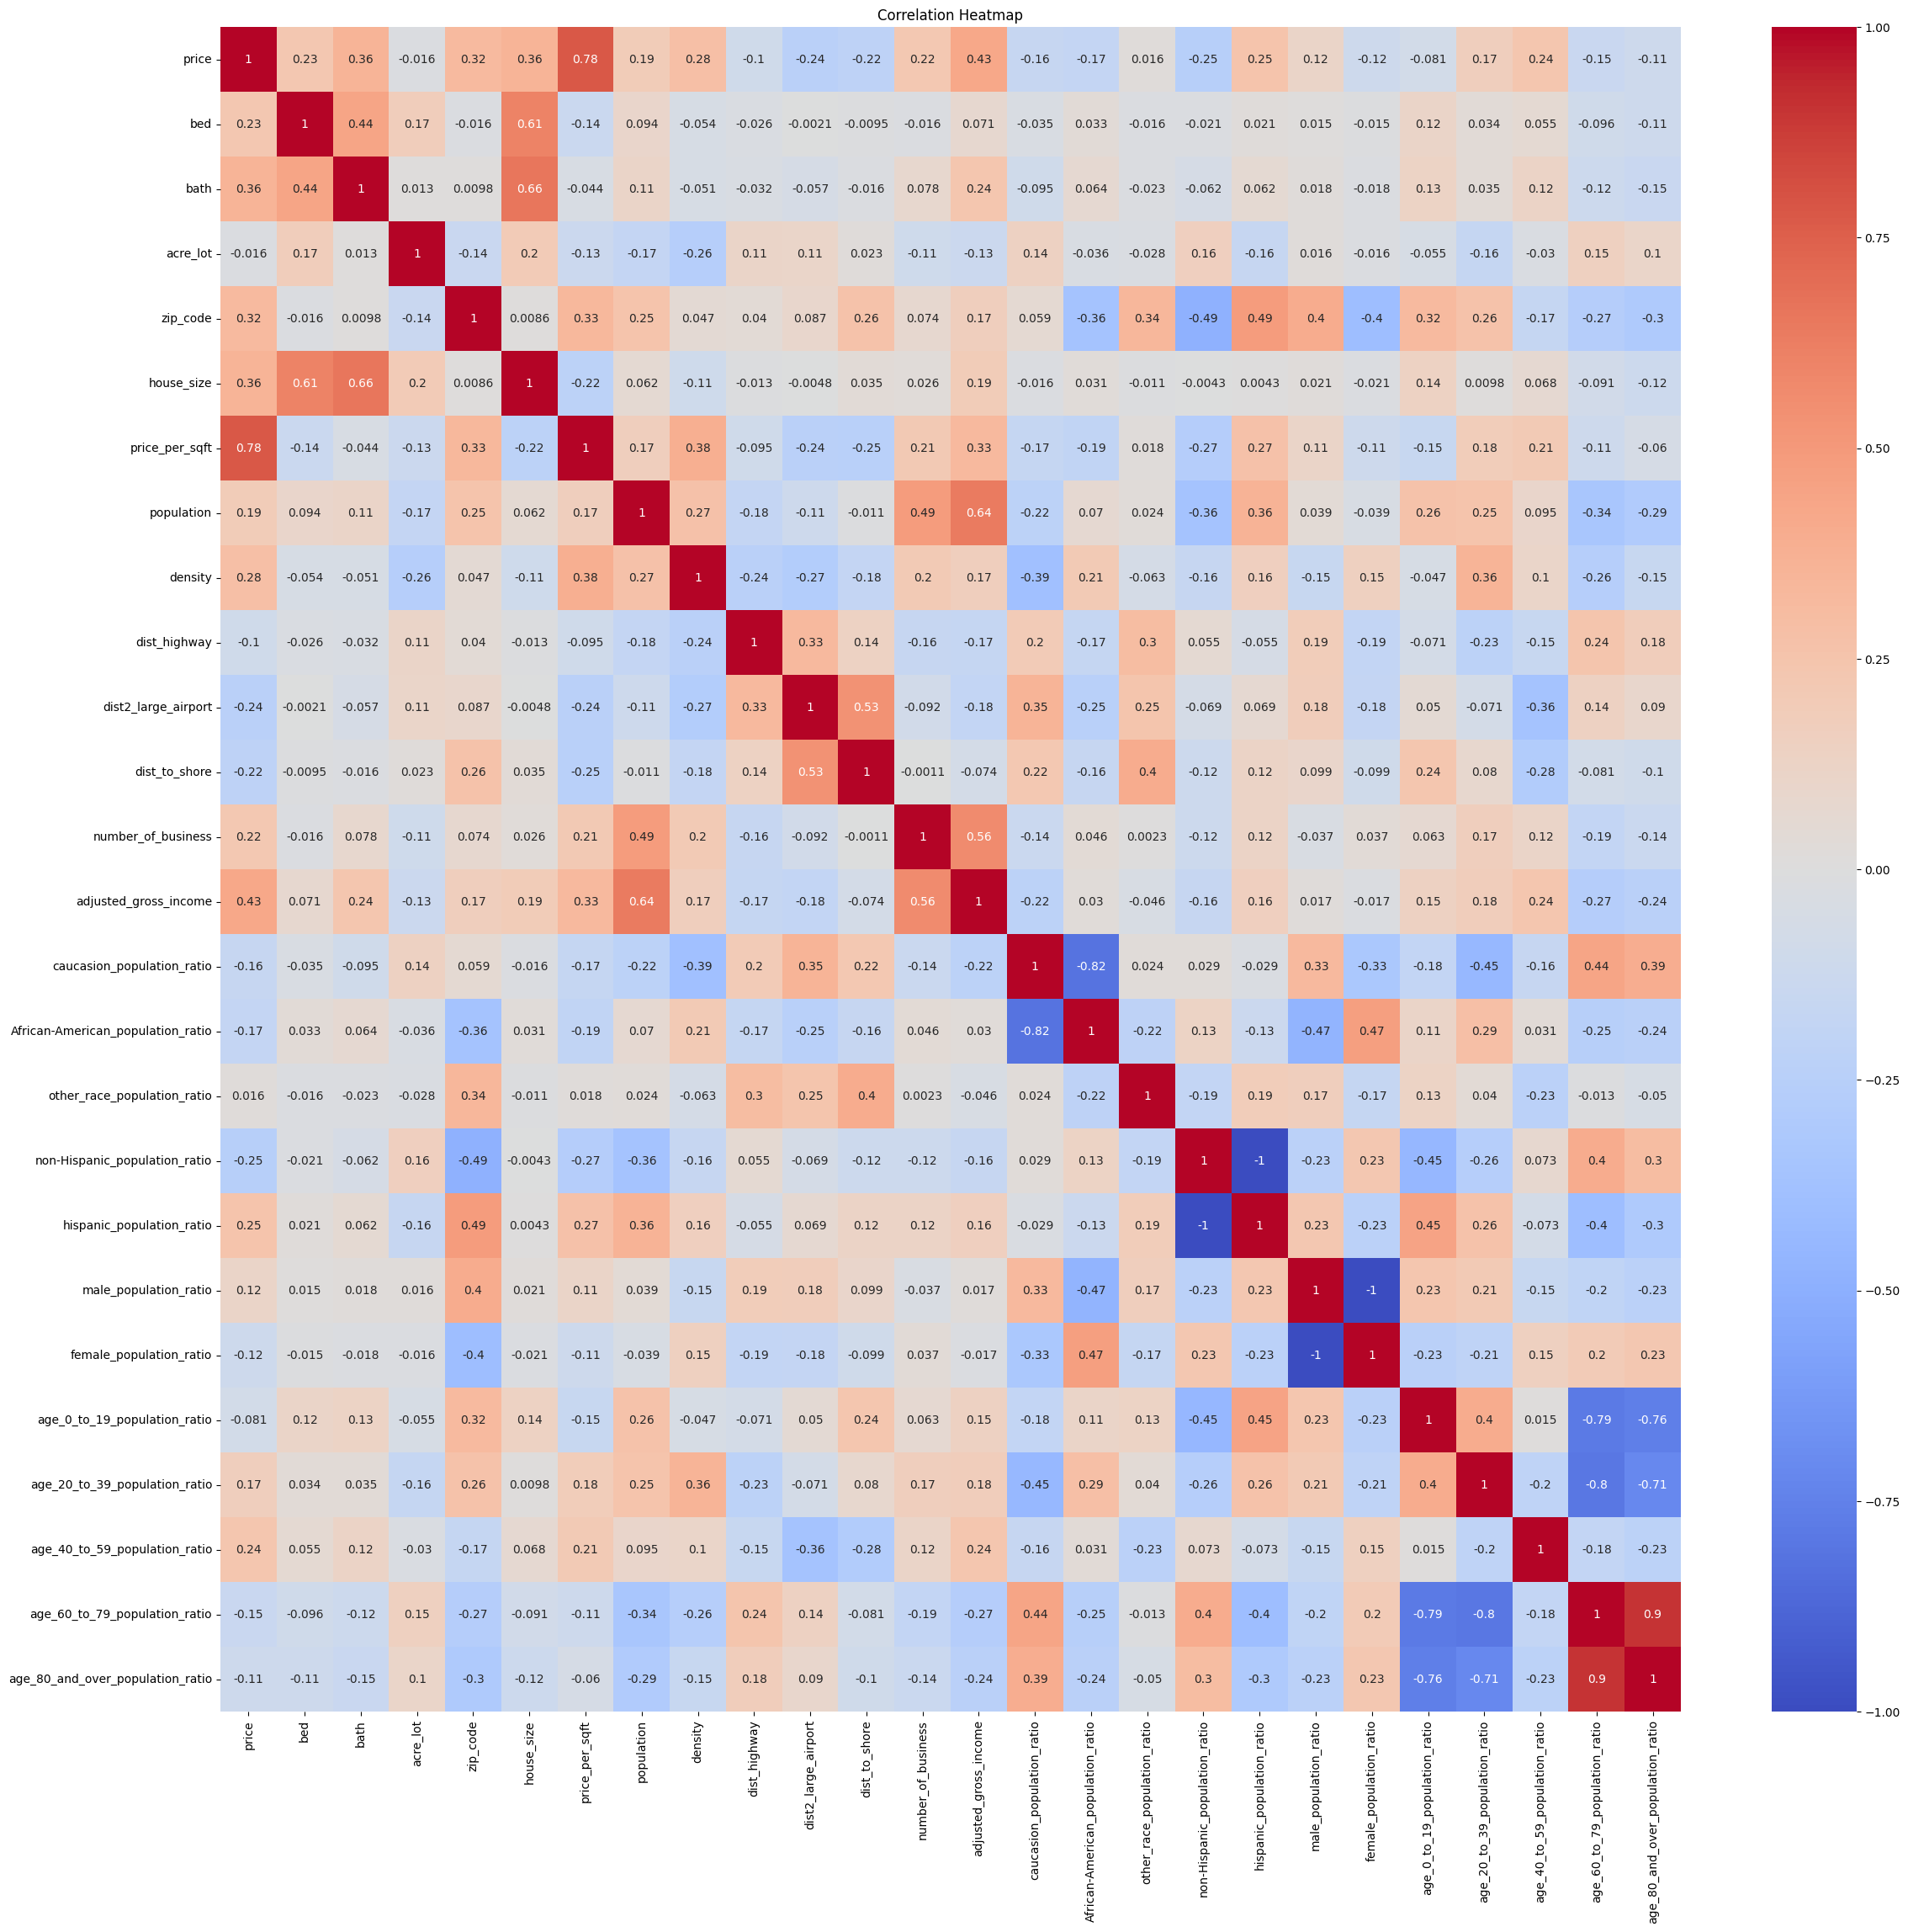

In [138]:
# Correlation heatmap
plt.figure(figsize=(28, 26))
sns.heatmap(real_estate_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Classification

In [139]:
# Stores features dataframe into variable called "features"
features = real_estate_df.drop(columns=['price', 'price_per_sqft', 'zip_code',
                                        'city', 'county', 'state'])

In [140]:
# Stores the classification target variable into "target"
target = real_estate_df['price']

In [155]:
# Use scikit-learn's train_test_split function to split data for regression
# into train and test sets. The split should be 80-20 meaning 80% for training
# and rest for testing.
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state= seed)

In [ ]:
# Initialize model with default parameters and fit it on the training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = log_reg.predict(X_test)

# Find the accuracy and store the value in `log_acc`
log_acc = accuracy_score(y_test, y_pred)

In [ ]:
# Initialize model with default parameters and fit it on the training set
rf = RandomForestClassifier(class_weight='balanced', n_estimators=120, max_depth=30, random_state=42)
rf.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = rf.predict(X_test)

# Find the accuracy and store the value in `rf_acc`
rf_acc = accuracy_score(y_test, y_pred)

# Compute the confusion matrix and save it to `rf_confusion`
rf_confusion = confusion_matrix(y_test, y_pred)

In [ ]:
# TO-DO: get feature importnce using built-in feature importance
feature_importance = rf.feature_importances_

# TO-DO: Get the top 10 and Create a DataFrame `feature_importance_df`
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Feature Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False).head(10)
# TO-DO: Visualize the top 10 feature importance using a barplot
feature_importance_df.plot(kind='bar', x='Feature', y='Feature Importance', title='Top 10 Feature Importance')
plt.show()

## PCA to Reduce Dimensionality

In [103]:
features = [
    'bed', 'bath', 'acre_lot', 'house_size', 'population', 'density',
    'dist_highway', 'dist2_large_airport', 'dist_to_shore', 'number_of_business',
    'adjusted_gross_income', 'caucasion_population_ratio',
    'African-American_population_ratio', 'other_race_population_ratio',
    'non-Hispanic_population_ratio', 'hispanic_population_ratio',
    'male_population_ratio', 'female_population_ratio',
    'age_0_to_19_population_ratio', 'age_20_to_39_population_ratio',
    'age_40_to_59_population_ratio', 'age_60_to_79_population_ratio',
    'age_80_and_over_population_ratio'
]
X = real_estate_df[features].copy()

In [142]:
# Intermediate step to address fac that PCA is not scale-invariant
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Instantiate and Fit PCA
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [143]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)

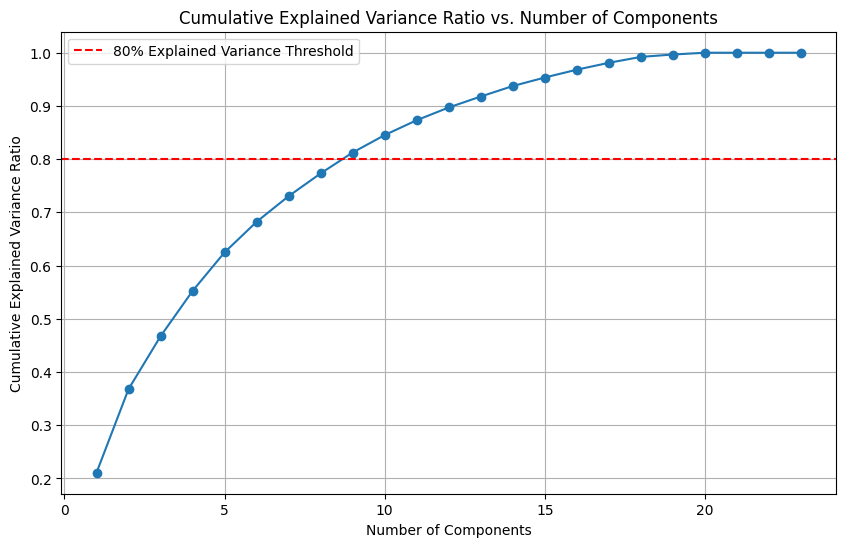

In [144]:
# Plot the cumulative explained_variance_ratio against the number of components
# to decide the number of components we should keep
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_evr) + 1), cum_evr, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance Threshold')
plt.legend()
plt.show()

In [145]:
# Get transformed set of principal components on x_test
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Refit and transform on training with parameter n (as deduced from the last step)
pca = PCA(n_components= 9)
X_train_pca = pca.fit_transform(X_train_scaled2)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca.transform(X_test)

# Regression

##Linear Regression (Unregularized)

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Initialize model with default parameters and fit it on the training set

reg = LinearRegression()
reg.fit(X_train, y_train)


# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg.predict(X_test)

# Find the R-squared score and store the value in `lin_reg_score`
lin_reg_score = r2_score(y_test, y_pred)

##Ridge Regression

In [147]:
# Intermediate step to address scale-invariance
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train)
X_test_scaled3 = scaler.transform(X_test)

In [149]:
# Import required libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


# Initialize model with alpha = 10 (keep other hyperparameters as default values) and fit it on the training set
alpha = 10
reg_ridge = Ridge(alpha=alpha)
reg_ridge.fit(X_train_scaled3, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_ridge.predict(X_test_scaled3)

# Find the R-squared score and store the value in `ridge_score`
ridge_score = r2_score(y_test, y_pred)

##Random Forest Regression

In [150]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Initialize model with default parameters and fit it on the training set

reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg_rf.predict(X_test)

# Find the R-squared score and store the value in `rfr_score`
rfr_score = r2_score(y_test, y_pred)

# K Means clustering

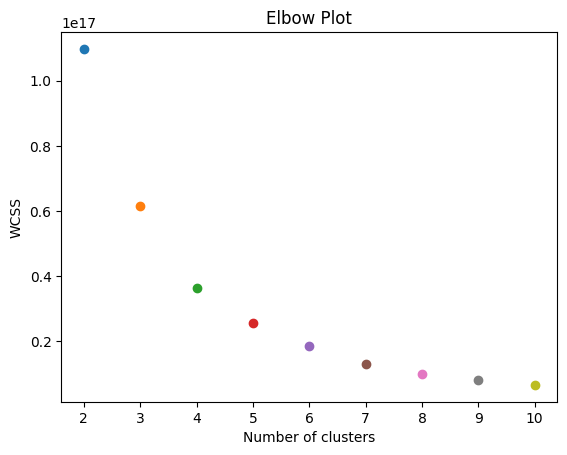

In [151]:
# Import the necessary libraries
from sklearn.cluster import KMeans
from collections import Counter

#   for k ranges from 2 to 10, fit on "features" to generate an elbow plot
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans.fit(features)
    wcss = kmeans.inertia_
    plt.scatter(k, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [153]:
# choose the best number of clusters (the elbow)
number_of_cluster = 5

## Refit with best number of clusters

In [154]:
# TO-DO: re-run the K-Means clustering with the best number of clusters, save the fitted model to `kmeans`
kmeans = KMeans(n_clusters= number_of_cluster, n_init= 5, random_state= 0)
kmeans.fit(features)

KMeans(n_clusters=5, n_init=5, random_state=0)

# 2. FEMA Disaster Declarations Data Cleaning and Wrangling

In this section, we clean and wrangle FEMA disaster declaration data to prepare it for analysis. The raw data is filtered to include only disasters from the past 10 years, joined with ZIP codes using a county-level crosswalk, and aggregated to generate a ZIP-level disaster count feature for downstream housing price modeling.

The final output table, `zip_disaster_counts`, contains the number of FEMA disaster declarations per ZIP code over the last decade. This will be used as a static risk feature in our housing price model.





##2.1 Import Required Libraries



In [122]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

## 2.2 Load FEMA Disaster Declarations Data

Note: We loaded the full dataset here to understand the available columns. In the next step, we’ll select only the relevant ones.

In [123]:
fema_url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries.csv"
fema_file_path = "DisasterDeclarationsSummaries.csv"

# Download the file if it doesn't already exist
if not os.path.exists(fema_file_path):
    response = requests.get(fema_url)
    with open(fema_file_path, "wb") as file:
        file.write(response.content)

# Load the entire dataset first
fema_raw_df = pd.read_csv(fema_file_path)

# Preview full column names
fema_raw_df.head()


<ipython-input-123-3cf98d19d813>:11: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  fema_raw_df = pd.read_csv(fema_file_path)


femaDeclarationString  disasterNumber state declarationType  \
0            EM-3611-VI            3611    VI              EM   
1            FM-5529-OR            5529    OR              FM   
2            FM-5528-OR            5528    OR              FM   
3            FM-5527-OR            5527    OR              FM   
4            EM-3611-VI            3611    VI              EM   

            declarationDate  fyDeclared    incidentType  \
0  2024-08-18T00:00:00.000Z        2024  Tropical Storm   
1  2024-08-09T00:00:00.000Z        2024            Fire   
2  2024-08-06T00:00:00.000Z        2024            Fire   
3  2024-08-02T00:00:00.000Z        2024            Fire   
4  2024-08-18T00:00:00.000Z        2024  Tropical Storm   

         declarationTitle  ihProgramDeclared  iaProgramDeclared  ...  \
0  TROPICAL STORM ERNESTO                  0                  0  ...   
1          LEE FALLS FIRE                  0                  0  ...   
2           ELK LANE FIRE                  0                  0  ...   
3    MILE MARKER 132 FIRE                  0                  0  ...   
4  TROPICAL STORM ERNESTO                  0                  0  ...   

   placeCode                          designatedArea declarationRequestNumber  \
0      99010  St. Croix (Island) (County-equivalent)                    24126   
1      99067                     Washington (County)                    24122   
2      99031                      Jefferson (County)                    24116   
3      99017                      Deschutes (County)                    24111   
4      99020   St. John (Island) (County-equivalent)                    24126   

  lastIAFilingDate  incidentId  region  designatedIncidentTypes  \
0              NaN  2024080901       2                  4,M,W,Z   
1              NaN  2024081001      10                        R   
2              NaN  2024080701      10                        R   
3              NaN  2024080301      10                        R   
4              NaN  2024080901       2                  4,M,W,Z   

                lastRefresh                                      hash  \
0  2025-03-25T22:41:27.147Z  4a8baf2d2f9117b4381e823fd96a41ea5f5c72d3   
1  2024-08-27T18:22:14.800Z  ae87cf3c6ed795015b714af7166c7c295b2b67c7   
2  2024-08-27T18:22:14.800Z  432cf0995c47e3895cea696ede5621b810460501   
3  2024-08-27T18:22:14.800Z  2f21d90cb6bc64b0d4121aa3f18d852bbb4b11fa   
4  2025-03-25T22:41:27.147Z  049f9b3d480604687cd32784486d584b44381ff4   

                                     id  
0  488c7bb4-5f20-4108-b499-99ef33953617  
1  09e3f81a-5e16-4b72-b317-1c64e0cfa59c  
2  59983f89-30bf-4888-b21b-62e8d57d9aac  
3  8d13ecf0-bc2f-496b-8c9f-b2e73da832a0  
4  4576151c-0d18-478f-a342-1f89463a736e  

[5 rows x 28 columns]

## 2.3 Select Relevant Columns：

In [124]:
# Select only the columns we need
fema_df = fema_raw_df[[
    'disasterNumber', 'state', 'designatedArea', 'declarationDate',
    'fipsStateCode', 'fipsCountyCode'
]].copy()

# Convert to datetime
fema_df['declarationDate'] = pd.to_datetime(fema_df['declarationDate'])

# Preview cleaned dataframe
fema_df.head()


disasterNumber state                          designatedArea  \
0            3611    VI  St. Croix (Island) (County-equivalent)   
1            5529    OR                     Washington (County)   
2            5528    OR                      Jefferson (County)   
3            5527    OR                      Deschutes (County)   
4            3611    VI   St. John (Island) (County-equivalent)   

            declarationDate  fipsStateCode  fipsCountyCode  
0 2024-08-18 00:00:00+00:00             78              10  
1 2024-08-09 00:00:00+00:00             41              67  
2 2024-08-06 00:00:00+00:00             41              31  
3 2024-08-02 00:00:00+00:00             41              17  
4 2024-08-18 00:00:00+00:00             78              20

## 2.4 Filter Data from the Last 10 Years

In [125]:
from pandas.tseries.offsets import DateOffset

# Today's date and dynamic 10-year cutoff
today = pd.Timestamp.now(tz='UTC')
cutoff_date = today - DateOffset(years=10)

# Filter FEMA data
fema_recent_df = fema_df[fema_df['declarationDate'] >= cutoff_date].copy()

# Check the date range
print("Earliest disaster:", fema_recent_df['declarationDate'].min())
print("Latest disaster:", fema_recent_df['declarationDate'].max())
print("Total records:", fema_recent_df.shape[0])

# Preview
fema_recent_df.head()

Earliest disaster: 2015-04-08 00:00:00+00:00
Latest disaster: 2025-04-05 00:00:00+00:00
Total records: 23427


disasterNumber state                          designatedArea  \
0            3611    VI  St. Croix (Island) (County-equivalent)   
1            5529    OR                     Washington (County)   
2            5528    OR                      Jefferson (County)   
3            5527    OR                      Deschutes (County)   
4            3611    VI   St. John (Island) (County-equivalent)   

            declarationDate  fipsStateCode  fipsCountyCode  
0 2024-08-18 00:00:00+00:00             78              10  
1 2024-08-09 00:00:00+00:00             41              67  
2 2024-08-06 00:00:00+00:00             41              31  
3 2024-08-02 00:00:00+00:00             41              17  
4 2024-08-18 00:00:00+00:00             78              20

## 2.5 Clean FEMA Data (Standardize & Prepare for Join)

In [126]:
# Construct full 5-digit county-level FIPS code
fema_recent_df['fips'] = (
    fema_recent_df['fipsStateCode'].astype(str).str.zfill(2) +
    fema_recent_df['fipsCountyCode'].astype(str).str.zfill(3)
)

# Preview
fema_recent_df.head()

disasterNumber state                          designatedArea  \
0            3611    VI  St. Croix (Island) (County-equivalent)   
1            5529    OR                     Washington (County)   
2            5528    OR                      Jefferson (County)   
3            5527    OR                      Deschutes (County)   
4            3611    VI   St. John (Island) (County-equivalent)   

            declarationDate  fipsStateCode  fipsCountyCode   fips  
0 2024-08-18 00:00:00+00:00             78              10  78010  
1 2024-08-09 00:00:00+00:00             41              67  41067  
2 2024-08-06 00:00:00+00:00             41              31  41031  
3 2024-08-02 00:00:00+00:00             41              17  41017  
4 2024-08-18 00:00:00+00:00             78              20  78020

## 2.6 Load County-to-ZIP Mapping Table from Kaggle

In [127]:
# Install kagglehub if not already installed
!pip install kagglehub --quiet

import kagglehub
import os
import pandas as pd

# Download dataset from Kaggle
path = kagglehub.dataset_download("danofer/zipcodes-county-fips-crosswalk")

print("Path to dataset files:", path)

# List files
files = os.listdir(path)
print("Files in dataset:", files)

# Load the crosswalk CSV
file_path = os.path.join(path, "ZIP-COUNTY-FIPS_2017-06.csv")
zip_crosswalk_df = pd.read_csv(file_path)

zip_crosswalk_df['fips'] = zip_crosswalk_df['STCOUNTYFP'].astype(str).str.zfill(5)


# Preview
zip_crosswalk_df.head()


100%|██████████| 184k/184k [00:00<00:00, 51.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/danofer/zipcodes-county-fips-crosswalk/versions/1
Files in dataset: ['ZIP-COUNTY-FIPS_2017-06.csv']


ZIP      COUNTYNAME STATE  STCOUNTYFP CLASSFP   fips
0  36003  Autauga County    AL        1001      H1  01001
1  36006  Autauga County    AL        1001      H1  01001
2  36067  Autauga County    AL        1001      H1  01001
3  36066  Autauga County    AL        1001      H1  01001
4  36703  Autauga County    AL        1001      H1  01001


## 2.7 Merge FEMA with ZIP (via FIPS)

In [128]:
fema_with_zip = fema_recent_df.merge(
    zip_crosswalk_df[['ZIP', 'fips']],
    on='fips',
    how='left'
)

# Drop FEMA rows with no ZIP match
#fema_with_zip = fema_with_zip.dropna(subset=['ZIP'])

# Preveiw
fema_with_zip.head()

disasterNumber state                          designatedArea  \
0            3611    VI  St. Croix (Island) (County-equivalent)   
1            3611    VI  St. Croix (Island) (County-equivalent)   
2            3611    VI  St. Croix (Island) (County-equivalent)   
3            5529    OR                     Washington (County)   
4            5529    OR                     Washington (County)   

            declarationDate  fipsStateCode  fipsCountyCode   fips      ZIP  
0 2024-08-18 00:00:00+00:00             78              10  78010    850.0  
1 2024-08-18 00:00:00+00:00             78              10  78010    840.0  
2 2024-08-18 00:00:00+00:00             78              10  78010    820.0  
3 2024-08-09 00:00:00+00:00             41              67  41067  97078.0  
4 2024-08-09 00:00:00+00:00             41              67  41067  97133.0

In [129]:
print(f"Total FEMA records after 10-year filter: {fema_recent_df.shape[0]}")
print(f"FEMA records after ZIP merge: {fema_with_zip.shape[0]}")
print(f"Number of FEMA records with ZIP: {fema_with_zip['ZIP'].notna().sum()}")
print(f"Number of FEMA records missing ZIP: {fema_with_zip['ZIP'].isna().sum()}")


Total FEMA records after 10-year filter: 23427
FEMA records after ZIP merge: 389086
Number of FEMA records with ZIP: 388152
Number of FEMA records missing ZIP: 934


## 2.8: Merge Validation — FEMA and ZIP Mapping

In this section, we validate whether FEMA disaster records were successfully joined with ZIP codes using fips codes. We check the match rate, ZIP assignment distribution, and inspect records with missing ZIPs.



### 2.8.1 Match Rate Check
This checks whether the merge was successful for a significant portion of the data.

In [130]:
total_records = fema_with_zip.shape[0]
matched_zip_count = fema_with_zip['ZIP'].notna().sum()
missing_zip_count = fema_with_zip['ZIP'].isna().sum()
match_rate = matched_zip_count / total_records

print(f"Total FEMA records (10 yrs):     {total_records}")
print(f"Matched ZIPs:                    {matched_zip_count}")
print(f"Missing ZIPs:                    {missing_zip_count}")
print(f"ZIP Match Rate:                  {match_rate:.2%}")


Total FEMA records (10 yrs):     389086
Matched ZIPs:                    388152
Missing ZIPs:                    934
ZIP Match Rate:                  99.76%


### 2.8.2 ZIP Duplication per FIPS

One county (FIPS) may correspond to multiple ZIP codes. We inspect the distribution to ensure the ZIP mapping is reasonable.


In [131]:
zip_per_fips = (
    fema_with_zip[['fips', 'ZIP']]
    .drop_duplicates()
    .groupby('fips')
    .size()
    .reset_index(name='zip_count')
)

zip_per_fips['zip_count'].describe()


count    3277.000000
mean       16.155935
std        18.770522
min         1.000000
25%         7.000000
50%        12.000000
75%        18.000000
max       494.000000
Name: zip_count, dtype: float64

###2.8.3 Missing ZIPs (Rows That Didn't Match)
Identify FEMA records from counties not covered in the ZIP mapping dataset.

In [132]:
missing_zip_df = fema_with_zip[fema_with_zip['ZIP'].isna()]
print(f"Number of FEMA records without ZIP after merge: {missing_zip_df.shape[0]}")
missing_zip_df[['state', 'designatedArea', 'fips']].drop_duplicates().head(10)


Number of FEMA records without ZIP after merge: 934


state                            designatedArea   fips
58       CA  Resighini Rancheria (Indian Reservation)  06000
123      ID              Nez Perce Indian Reservation  16000
165      WA               Colville Indian Reservation  53000
198      WA                        Yakama Reservation  53000
452      NM                           Mescalero Tribe  35000
3083     MT                   Crow Indian Reservation  30000
5627     OR           Warm Springs Indian Reservation  41000
6452     AZ             San Carlos Indian Reservation  04000
7091     CA                Morongo Indian Reservation  06000
11913    CA    Hopland Rancheria (Indian Reservation)  06000

#### 2.8.3 ZIP Missing Analysis

After merging FEMA disaster data with ZIP codes using FIPS codes, **934** records could not be matched.

Top unmatched designatedArea examples:
*   Resighini Rancheria (Indian Reservation), CA
*   Nez Perce Indian Reservation, ID
*   Yakama Reservation, WA
*   Warm Springs Indian Reservation, OR
*   Crow Indian Reservation, MT
*   San Carlos Indian Reservation, AZ
*   Hopland Rancheria (Indian Reservation), CA



**Possible reasons:**
- Indian Reservations and tribal lands often don't align with standard county or ZIP boundaries

- Non-standard area names that don’t match ZIP datasets (e.g., Rancheria, Reservation)

**Action:** These records can be excluded


In [133]:
# Drop FEMA records with missing ZIPs
fema_with_zip['zip_matched'] = fema_with_zip['ZIP'].notna()
fema_matched_df = fema_with_zip[fema_with_zip['zip_matched']].copy().reset_index(drop=True)

# Preview
print(fema_matched_df.shape)
fema_matched_df.head()

(388152, 9)


disasterNumber state                          designatedArea  \
0            3611    VI  St. Croix (Island) (County-equivalent)   
1            3611    VI  St. Croix (Island) (County-equivalent)   
2            3611    VI  St. Croix (Island) (County-equivalent)   
3            5529    OR                     Washington (County)   
4            5529    OR                     Washington (County)   

            declarationDate  fipsStateCode  fipsCountyCode   fips      ZIP  \
0 2024-08-18 00:00:00+00:00             78              10  78010    850.0   
1 2024-08-18 00:00:00+00:00             78              10  78010    840.0   
2 2024-08-18 00:00:00+00:00             78              10  78010    820.0   
3 2024-08-09 00:00:00+00:00             41              67  41067  97078.0   
4 2024-08-09 00:00:00+00:00             41              67  41067  97133.0   

   zip_matched  
0         True  
1         True  
2         True  
3         True  
4         True

###2.8.4 FEMA-ZIP Merge Summary

In [134]:
# Total rows
rows_before = fema_with_zip.shape[0]
rows_after = fema_matched_df.shape[0]

# ZIP matching stats
matched_rows = fema_with_zip['ZIP'].notna().sum()
missing_rows = fema_with_zip['ZIP'].isna().sum()
match_rate = matched_rows / rows_before
final_match_rate = 1.0  # because all rows in fema_matched_df have ZIPs

# ZIPs per FIPS (before filtering)
zip_per_fips = (
    fema_with_zip[['fips', 'ZIP']]
    .drop_duplicates()
    .groupby('fips')
    .size()
    .reset_index(name='zip_count')
)

# Summary stats
print("FEMA-ZIP Merge Summary:")
print(f"Total FEMA records (before filtering):   {rows_before}")
print(f"Total FEMA records (after filtering):    {rows_after}")
print(f"Matched ZIPs:                             {matched_rows}")
print(f"Missing ZIPs:                             {missing_rows}")
print(f"ZIP Match Rate:                           {match_rate:.2%}")
print(f"ZIP Match Rate (final dataset):           {final_match_rate:.2%}")
print(f"Unique county FIPS:                       {zip_per_fips.shape[0]}")
print(f"Median ZIPs per county:                   {zip_per_fips['zip_count'].median():.0f}")
print(f"Max ZIPs per county:                      {zip_per_fips['zip_count'].max()}")


FEMA-ZIP Merge Summary:
Total FEMA records (before filtering):   389086
Total FEMA records (after filtering):    388152
Matched ZIPs:                             388152
Missing ZIPs:                             934
ZIP Match Rate:                           99.76%
ZIP Match Rate (final dataset):           100.00%
Unique county FIPS:                       3277
Median ZIPs per county:                   12
Max ZIPs per county:                      494


##2.10 Disaster Count Aggregation by ZIP (Last 10 Years)

To support downstream analysis, we compute the number of FEMA disaster declarations in the past 10 years for each ZIP code. This gives a static risk exposure feature per ZIP that can be merged with housing data.

The aggregation is based on the cleaned FEMA dataset `fema_matched_df`, which includes only matched ZIP-level records in past 10 years.

In [135]:
# Count the number of disasters per ZIP code
zip_disaster_counts = (
    fema_matched_df.groupby('ZIP')['disasterNumber']
    .nunique()
    .reset_index(name='disaster_count_10yrs')
)

# Format ZIPs as 5-digit strings
# zip_disaster_counts['ZIP'] = zip_disaster_counts['ZIP'].astype(int).astype(str).str.zfill(5)

# Make sure ZIP is stored as integer (drop decimals)
zip_disaster_counts['ZIP'] = zip_disaster_counts['ZIP'].astype(int)

# Reset index for cleanliness
zip_disaster_counts = zip_disaster_counts.reset_index(drop=True)

# Preview top ZIPs by disaster count
zip_disaster_counts.sort_values(by='disaster_count_10yrs', ascending=False).head(10)


ZIP  disaster_count_10yrs
35885  91710                    41
35884  91709                    41
35934  91786                    41
35920  91766                    41
35623  90623                    39
35625  90630                    39
35626  90631                    39
35630  90638                    39
35680  90808                    39
36711  93560                    38

## Summary of Disaster Count Aggregation

The resulting table `zip_disaster_counts` contains the number of unique FEMA disaster declarations per ZIP code over the past 10 years. Each row represents a ZIP and its corresponding disaster exposure:

- **ZIP**: 5-digit ZIP code (int)
- **disaster_count_10yrs**: Total number of FEMA disaster declarations in that ZIP over the past 10 years

This table will serve as a **static risk feature** that can be joined with the main housing dataset using the ZIP code as key.


# HPI Dataframe by Zip

## Uploading Data

In [139]:
file_path = '/content/drive/MyDrive/CIS 5450 Group Project/data_sets/hpi_at_bdl_zip5.csv'
# Read the file
hpi_df = pd.read_csv(file_path)
hpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668175 entries, 0 to 668174
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Five-Digit ZIP Code  668175 non-null  int64  
 1   Year                 668175 non-null  int64  
 2   Annual Change (%)    626080 non-null  float64
 3   HPI                  651400 non-null  float64
 4   HPI with 1990 base   396604 non-null  float64
 5   HPI with 2000 base   573289 non-null  float64
 6   Unnamed: 6           0 non-null       float64
 7   Unnamed: 7           0 non-null       float64
 8   Unnamed: 8           0 non-null       float64
 9   Unnamed: 9           0 non-null       float64
 10  Unnamed: 10          0 non-null       float64
 11  Unnamed: 11          0 non-null       float64
 12  Unnamed: 12          0 non-null       float64
dtypes: float64(11), int64(2)
memory usage: 66.3 MB


In [140]:
# Drop meaningless columns
columns_to_drop = ["HPI with 2000 base", "Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12",]
hpi_df = hpi_df.drop(columns=columns_to_drop)

# Convert "Five-Digit ZIP Code" to string and rename the column to zip_code
hpi_df["Five-Digit ZIP Code"] = hpi_df["Five-Digit ZIP Code"].apply(lambda x: f"{int(x):05}")
hpi_df = hpi_df.rename(columns={"Five-Digit ZIP Code": "zip_code"})

# Filter timeline from 1990-2020
filtered_hpi_df = hpi_df[(hpi_df['Year'] >= 1990) & (hpi_df['Year'] <= 2020)]

# Rename columns
filtered_hpi_df = filtered_hpi_df.rename(columns={"Annual Change (%)": "annual_change"})
filtered_hpi_df = filtered_hpi_df.rename(columns={"HPI with 1990 base": "hpi_1990"})


filtered_hpi_df = filtered_hpi_df.reset_index(drop=True)
filtered_hpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512396 entries, 0 to 512395
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   zip_code       512396 non-null  object 
 1   Year           512396 non-null  int64  
 2   annual_change  493590 non-null  float64
 3   HPI            507056 non-null  float64
 4   hpi_1990       283174 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.5+ MB


In [141]:
filtered_hpi_df.head(10)

zip_code  Year  annual_change     HPI  hpi_1990
0    01001  1990          -1.51  191.16    100.00
1    01001  1991          -5.50  180.65     94.50
2    01001  1992          -1.56  177.84     93.03
3    01001  1993           0.56  178.84     93.55
4    01001  1994          -3.05  173.39     90.70
5    01001  1995           1.91  176.70     92.44
6    01001  1996           0.12  176.91     92.55
7    01001  1997          -1.33  174.56     91.32
8    01001  1998           4.47  182.36     95.39
9    01001  1999           1.60  185.27     96.92

## Check Data Quality for Housing Price Time Series

In [142]:
# Check the number of rows in dataframe
print("Rows in filtered_hpi_df before dropping NA:\n", len(filtered_hpi_df))
print("\n")

# Check Nulls or missing values
missing_values = filtered_hpi_df.isna().sum()
missing_percentage = (missing_values / len(filtered_hpi_df)) * 100

print("Missing value breakdown:\n", missing_values)
print("\n")
print("Missing Percentage:\n", missing_percentage)
print("\n")
# Find rows where only 'HPI' is NaN and other columns have non-NaN values
only_hpi_na = filtered_hpi_df[filtered_hpi_df['HPI'].isna() & filtered_hpi_df.drop(columns=['HPI']).notna().all(axis=1)]
# Display how many rows have only 'HPI' NaN and not NaN in other columns
print(f"Rows with NaN in 'HPI' but not in other columns: {only_hpi_na.shape[0]}")

Rows in filtered_hpi_df before dropping NA:
 512396


Missing value breakdown:
 zip_code              0
Year                  0
annual_change     18806
HPI                5340
hpi_1990         229222
dtype: int64


Missing Percentage:
 zip_code          0.000000
Year              0.000000
annual_change     3.670208
HPI               1.042163
hpi_1990         44.735322
dtype: float64


Rows with NaN in 'HPI' but not in other columns: 0


In [143]:
# Drop hpi_1990 column since there is a large amount of missing value and won't be good reference data point
filtered_hpi_df = filtered_hpi_df.drop(columns=['hpi_1990'])
filtered_hpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512396 entries, 0 to 512395
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   zip_code       512396 non-null  object 
 1   Year           512396 non-null  int64  
 2   annual_change  493590 non-null  float64
 3   HPI            507056 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.6+ MB


In [144]:
# Drop NAs in HPI and using HPI as major housing price prediction
# // Potetial Alternative Treatment on Missing values is to get Average of HPI for ZIPs if they are in the same MSA or County

cleaned_hpi_df = filtered_hpi_df.dropna(subset=['annual_change', 'HPI'], how='all')
print("Rows in cleaned_hpi_df after dropping NA:\n", len(cleaned_hpi_df))

cleaned_hpi_df.head()

Rows in cleaned_hpi_df after dropping NA:
 507056


zip_code  Year  annual_change     HPI
0    01001  1990          -1.51  191.16
1    01001  1991          -5.50  180.65
2    01001  1992          -1.56  177.84
3    01001  1993           0.56  178.84
4    01001  1994          -3.05  173.39

## Transform Data for Zip code level with annual HPI info

In [145]:
# Convert the HPI table by Zip level with annual HPI info appended for each year


# Pivot the data: reshape so each year’s values become their own set of columns
pivoted_hpi_df = filtered_hpi_df.pivot_table(
    index='zip_code',
    columns='Year',
    values=['HPI', 'annual_change']
)

# Flatten the multi-level column index
pivoted_hpi_df.columns = [f'{metric}_{year}' for metric, year in pivoted_hpi_df.columns]

# Reset index to turn zip_code back into a column
pivoted_hpi_df = pivoted_hpi_df.reset_index()

# Display the result
print(pivoted_hpi_df.head())
print("\n")
print("Rows in pivoted_hpi_df", len(pivoted_hpi_df))

  zip_code  HPI_1990  HPI_1991  HPI_1992  HPI_1993  HPI_1994  HPI_1995  \
0    01001    191.16    180.65    177.84    178.84    173.39    176.70   
1    01002    204.49    198.94    197.17    196.69    200.77    196.13   
2    01005       NaN       NaN    100.00    100.17     94.10    100.28   
3    01007    160.18    155.68    151.99    153.49    151.84    152.76   
4    01008       NaN       NaN       NaN       NaN       NaN       NaN   

   HPI_1996  HPI_1997  HPI_1998  ...  annual_change_2011  annual_change_2012  \
0    176.91    174.56    182.36  ...               -2.63               -4.48   
1    199.60    209.49    213.47  ...               -1.63               -2.35   
2     99.63    101.98    105.71  ...               -8.32               -4.70   
3    154.99    156.68    160.90  ...               -2.96               -1.65   
4       NaN       NaN       NaN  ...               -6.79               -0.45   

   annual_change_2013  annual_change_2014  annual_change_2015  \
0        

In [146]:
# merged_hpi_df = pd.merge(merged_zip_county_MSA_df, pivoted_hpi_df, left_on='zip_code', right_on='zip_code', how='inner')

merged_hpi_df = pd.merge(
    merged_zip_county_MSA_df,
    pivoted_hpi_df,
    left_on='zip_code',
    right_on='zip_code',
    how='outer',  # use 'outer' to catch all unmatched rows from both sides
    indicator=True
)

NameError: name 'merged_zip_county_MSA_df' is not defined

In [ ]:
# Rows only from left DataFrame (no match from pivoted_hpi_df)
unmatched_left = merged_hpi_df[merged_hpi_df['_merge'] == 'left_only']

# Rows only from right DataFrame (no match from merged_zip_county_MSA_df)
unmatched_right = merged_hpi_df[merged_hpi_df['_merge'] == 'right_only']

# Zip codes from left DataFrame that had no match in right
print("Unmatched zip codes from left DataFrame:")
print(unmatched_left['zip_code'].unique())

# Zip codes from right DataFrame that had no match in left
print("Unmatched zip codes from right DataFrame:")
print(unmatched_right['zip_code'].unique())
print("\n")

missing_from_right = (merged_hpi_df['_merge'] == 'left_only').sum()
missing_from_left = (merged_hpi_df['_merge'] == 'right_only').sum()
print(f"Zip codes missing from pivoted_hpi_df (right): {missing_from_right}")
print(f"Zip codes missing from merged_zip_county_MSA_df (left): {missing_from_left}")

# merged_hpi_df.drop(columns=['_merge'], inplace=True)

In [ ]:
print(merged_hpi_df.head())
print("\n")
print("Rows in pivoted_hpi_df", len(pivoted_hpi_df))

## Merging HPI time series with Demographic and FEMA dataframe

In [ ]:
# Merge HPI with Demographic and FEMA dataframe

